<a href="https://colab.research.google.com/github/Cseudave/fifa21_cleaning/blob/main/Fifa21_Clearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpiar datos

## Importar librerias

In [ ]:
import pandas as pd
import numpy as np

## Importar la base de datos

In [ ]:
# Ingresar a drive

In [ ]:
cd drive/MyDrive/Kaggle_Projects/

/content/drive/MyDrive/Kaggle_Projects


In [ ]:
df = pd.read_csv('fifa21_raw_data.csv')

<ipython-input-4-4fe8b2e57b28>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_raw_data.csv')


In [ ]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


## Exploracion general

El objetivo es limpiar todas las columnas y normalizar la tabla en diferentes tablas que agrupen las columnas para fines prácticos que atiendan tareas más especificas.
1. Limpiar columnas
2. Entender utilidades de las columnas
3. Normalizar base de datos 

In [ ]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [ ]:
df.info()
# Tenemos un DataFrame de 77 columnas y 18978 filas en casi todas las columnas

In [ ]:
cols = df.columns.tolist()
dtypes = df.dtypes.tolist()

La siguiente función permite hacer una revisión rápida de las columnas y guardar un comentario. Para crear una tabla con las características más importantes y los cambios elegidos.

In [ ]:
columns = []
nnulls = []
uniques = []
examples = []
uniques = []
remarks = []
dtypes = []
i = 0
for col in cols:
  nnull = df[col].isnull().sum()
  example = df[col].iloc[0:3]
  unique = len(df[col].unique())
  print('----------------------------------')
  print(f'Columna: {col} \n \
        Tipo: {df[col].dtypes} \n \
        Unicos: {unique} \n \
        (Total): {df[col].shape[0]}\
        Nulos: {nnull} \n \
        Ejemplos:\n{example}')
  remark = input('Cambios por hacer:') 
  columns.append(col)
  uniques.append(unique)
  dtypes.append(df[col].dtypes)
  nnulls.append(nnull)
  examples.append(example)
  remarks.append(remark)

summary_changes = pd.DataFrame({
    'Columna': columns,
    'Tipo': dtypes,
    'Elementos únicos': uniques,
    'n_nulls': nnulls,
    'ejemplos': examples,
    'Anotaciones': remarks
})

----------------------------------
Columna: photoUrl 
         Tipo: object 
         Unicos: 18978 
         (Total): 18979        Nulos: 0 
         Ejemplos:
0    https://cdn.sofifa.com/players/158/023/21_60.png
1    https://cdn.sofifa.com/players/020/801/21_60.png
2    https://cdn.sofifa.com/players/200/389/21_60.png
Name: photoUrl, dtype: object
Cambios por hacer:Revisar patrón. Revisar repetición.
----------------------------------
Columna: LongName 
         Tipo: object 
         Unicos: 18851 
         (Total): 18979        Nulos: 0 
         Ejemplos:
0                    Lionel Messi
1    C. Ronaldo dos Santos Aveiro
2                       Jan Oblak
Name: LongName, dtype: object
Cambios por hacer:Revisar duplicados. Agregar nombre completo.
----------------------------------
Columna: playerUrl 
         Tipo: object 
         Unicos: 18978 
         (Total): 18979        Nulos: 0 
         Ejemplos:
0    http://sofifa.com/player/158023/lionel-messi/2...
1    http://sofifa.c

In [ ]:
# Ahora solo debemos hacer los cambios planeados apriori
# En el caso de las columnas de estadísticas por jugador se puede comprobar que la distribución sean normales

summary_changes.to_csv('summary_changes_fifa21.csv', index=False)

In [ ]:
# # Cargar summary_changes
# sc = pd.read_csv('summary_changes_fifa21.csv') 


In [ ]:
summary_changes.iloc[0]

Columna                                                      photoUrl
Tipo                                                           object
Elementos únicos                                                18978
n_nulls                                                             0
ejemplos            0    https://cdn.sofifa.com/players/158/023/21...
Anotaciones                       Revisar patrón. Revisar repetición.
Name: 0, dtype: object

## Columna 'Name_url'

In [ ]:
import re

# La expresión que deben obedecer todos los elementos
pattern = r'https://cdn\.sofifa\.com/players/\d+/\d+/21_60\.png'
matches = df[cols[0]].str.match(pattern)
if sum(matches) == df.shape[0]:
  print('[OK] Todas las filas corresponden al patrón')
else:
  print(f'No corresponden {df.shape[0] - sum(matches)} filas al patrón')

[OK] Todas las filas corresponden al patrón


In [ ]:
summary_changes.iloc[1]

Columna                                                      LongName
Tipo                                                           object
Elementos únicos                                                18851
n_nulls                                                             0
ejemplos            0                    Lionel Messi
1    C. Rona...
Anotaciones              Revisar duplicados. Agregar nombre completo.
Name: 1, dtype: object

In [ ]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


Debería existir un nombre por cada columna, salvo que coincidan los nombres de dos o mas jugadores, por lo que diferiria su nacionalidad. 

Para completar los nombres se pueden mezclar los datos de 'LongName', 'playerUrl' y 'Name' 

In [ ]:
# La siguiente función busca en el patrón de la url el nombre y lo formatea
def url_to_name(url):

  pattern = r"/player/\d+/(.*?)/"
  match = re.search(pattern, url)

  if match:
      jugador = match.group(1)
      return jugador.replace('-',' ').title()
  else:
      return "No se encontró el jugador"

In [ ]:
df['Name_url'] = df['playerUrl'].apply(url_to_name)

## Columna'LongName'

In [ ]:
# Vemos el porcentaje de url identicas al longname
print((df['LongName'] == df['Name_url']).sum()/len(df)*100)

69.96680541651298


In [ ]:
# La diferencias puede deberse a los puntos y acentos
def to_unicode(text):
    translate_re = re.compile(r'[ÁÉÍÓÚÑÜáéíóúñü]')
    translate = {
        "Á": "A", "É": "E", "Í": "I", "Ó": "O", "Ú": "U", "Ñ": "N", "Ü": "U",
        "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u", "ñ": "n", "ü": "u"
    }
    text = translate_re.sub(lambda match: translate[match.group(0)], text).lower()
    text = text.replace('.', '')
    text = text.replace("'", "")
    return text.title()

In [ ]:
df['Name_unicode'] = df['LongName'].apply(to_unicode)

In [ ]:
# Vemos el porcentaje de url identicas al longname
print((df['Name_url'] == df['Name_unicode']).sum()/len(df)*100)

89.29869856156805


In [ ]:
df[['LongName','Name_url','Name_unicode']].loc[~(df['Name_url'] == df['Name_unicode'])]

,LongName,Name_url,Name_unicode
11,Marc-André ter Stegen,Marc Andre Ter Stegen,Marc-Andre Ter Stegen
27,Samir Handanovič,Samir Handanovic,Samir Handanovič
29,Trent Alexander-Arnold,Trent Alexander Arnold,Trent Alexander-Arnold
41,Pierre-Emerick Aubameyang,Pierre Emerick Aubameyang,Pierre-Emerick Aubameyang
42,Wojciech Szczęsny,Wojciech Szczesny,Wojciech Szczęsny
...,...,...,...
18802,Noah Solskjær,Noah Solskjaer,Noah Solskjær
18858,Maximilian Großer,Maximilian Grosser,Maximilian Großer
18876,Mackye Townsend-West,Mackye Townsend West,Mackye Townsend-West
18894,Tailang Chen-Zeng,Tailang Chen Zeng,Tailang Chen-Zeng


In [ ]:
print(f"El porcentaje de LongName identico a Name_url {(df['Name_url'] == df['Name_unicode']).sum()/len(df)*100}")

El porcentaje de LongName identico a Name_url 89.29869856156805


De manera que los nombres que no corresponden son aquellos que utilizan un guion o carácteres de otros idiomas

In [ ]:
# Vamos agregar el nombre completo en las filas donde hay un nombre abreviado con solo su inicial
patter = r'[a-zA-Z]\. '
df[['LongName','Name', 'Name_url']].loc[df['LongName'].str.contains(patter)].head(10)

,LongName,Name,Name_url
1,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,C Ronaldo Dos Santos Aveiro
160,Rafael A. Ferreira Silva,Rafa,Rafael A Ferreira Silva
177,Lucas Rodrigues M. Silva,Lucas Moura,Lucas Rodrigues M Silva
195,José Paulo Bezerra M. Júnior,Paulinho,Jose Paulo Bezerra M Junior
290,Rosberto J. Dourado Santos,Rosberto Dourado,Rosberto J Dourado Santos
513,Aluísio Chaves Rib. Moraes Júnior,Júnior Moraes,Aluisio Chaves Rib Moraes Junior
633,João Pedro G. Santos Galvão,João Pedro,Joao Pedro G Santos Galvao
717,Gabriel dos S. Magalhães,Gabriel,Gabriel Dos S Magalhaes
728,G. Pierre Paiva Souza,Guilson Paiva,G Pierre Paiva Souza
732,A. Benjamin Chiamuloira Paes,Antônio Chiamuloira,A Benjamin Chiamuloira Paes


Salvo casos excepcionales como el nombre de C. Ronaldo, en la mayoría no se puede obtener el nombre abreviado de la columna Name. 

Para crear una nueva columna que convierta las iniciales en el posible nombre se debe revisar si existe un nombre en 'Name' que comienza con esa inicial.

## Crear Columna 'Full_name'

In [ ]:
def full_name(LongName, Name):
  split_name = Name.split()
  for e in re.finditer(patter, LongName):
    inicial = LongName[e.start():e.end()-2]
    for name in split_name:
      if inicial == name[0]:
        full_name = LongName[0:e.start()] + ' ' + name +' ' + LongName[e.end():-1]
        return full_name.strip()
  return LongName

In [ ]:
df['Full_name'] = df.apply(lambda row: full_name(row['LongName'], row['Name']), axis=1)

In [ ]:
df[['LongName','Name', 'Full_name']].loc[df['LongName'].str.contains(patter)].head(10)

,LongName,Name,Full_name
1,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveir
160,Rafael A. Ferreira Silva,Rafa,Rafael A. Ferreira Silva
177,Lucas Rodrigues M. Silva,Lucas Moura,Lucas Rodrigues Moura Silv
195,José Paulo Bezerra M. Júnior,Paulinho,José Paulo Bezerra M. Júnior
290,Rosberto J. Dourado Santos,Rosberto Dourado,Rosberto J. Dourado Santos
513,Aluísio Chaves Rib. Moraes Júnior,Júnior Moraes,Aluísio Chaves Rib. Moraes Júnior
633,João Pedro G. Santos Galvão,João Pedro,João Pedro G. Santos Galvão
717,Gabriel dos S. Magalhães,Gabriel,Gabriel dos S. Magalhães
728,G. Pierre Paiva Souza,Guilson Paiva,Guilson Pierre Paiva Souz
732,A. Benjamin Chiamuloira Paes,Antônio Chiamuloira,Antônio Benjamin Chiamuloira Pae


In [ ]:
print(f"Las filas afectadas son: {(df['Full_name'].loc[df['LongName'].str.contains(patter)] == df['LongName'].loc[df['LongName'].str.contains(patter)]).sum()/ len(df['Full_name'].loc[df['LongName'].str.contains(patter)]) *100} % de \
{len(df['Full_name'].loc[df['LongName'].str.contains(patter)])}")

Las filas afectadas son: 80.0 % de 65


In [ ]:
# Creamos una funcion que permite ver la cantidad de duplicados en alguna columna
def duplicados(col):
  if len(df[col].unique()) + 1 == df[col].shape[0]:
    print('[OK] Solo hay elementos unicos')
  else:
    print(f'Se repiten {df[col].shape[0]- len(df[col].unique())}')
    return df[df[col].duplicated()].sort_values(col)

In [ ]:
i_dup = duplicados('Full_name')

Se repiten 128


Puede ser que el nombre de dos jugadores coincida, pero la probabilidad que también coincida su nacionalidad o alguna estadística es muy pequeña.

## Buscando duplicados

In [ ]:
duplicados = df.duplicated(subset=['Full_name', 'Nationality'], keep=False)
print(duplicados.sum())

118


In [ ]:
df[['Full_name', 'Nationality']].loc[duplicados].sort_values(by='Full_name')

,Full_name,Nationality
16743,Abdulaziz Majrashi,Saudi Arabia
14888,Abdulaziz Majrashi,Saudi Arabia
13459,Abdullah Al Shammari,Saudi Arabia
17585,Abdullah Al Shammari,Saudi Arabia
4203,Adama Traoré,Mali
...,...,...
14472,Yang Liu,China PR
15717,Yuan Zhang,China PR
18703,Yuan Zhang,China PR
14852,Yuki Kobayashi,Japan


No es tan sorprendente, debido que los nombres son más frecuentes y similares según la nacionalidad, porque están correlacionados. En cambio, si se revisa una estadística al azar como "PAC" habla de un jugador que comparte en nombre, nacionalidad y habilidad.

In [ ]:
duplicados = df.duplicated(subset=['Full_name', 'Nationality', 'PAC'], keep=False)
print(duplicados.sum())

8


Sin embargo, dada la gran cantidad de jugadores, incluso hay ocho coincidencias.

In [ ]:
duplicados = df.duplicated(subset=['Full_name', 'Nationality', 'PAC', 'SHO'], keep=False)
print(duplicados.sum())

2


In [ ]:
df.duplicated(keep=False).sum()

2

Al parecer solo hay un valor duplicado:

In [ ]:
df[df.duplicated(keep=False)]

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Name_url,Name_unicode,Full_name
899,https://cdn.sofifa.com/players/251/698/21_60.png,Kevin Berlaso,http://sofifa.com/player/251698/kevin-berlaso/...,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,...,78,56,69,77,72,68,\n12,Kevin Berlaso,Kevin Berlaso,Kevin Berlaso
944,https://cdn.sofifa.com/players/251/698/21_60.png,Kevin Berlaso,http://sofifa.com/player/251698/kevin-berlaso/...,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,...,78,56,69,77,72,68,\n12,Kevin Berlaso,Kevin Berlaso,Kevin Berlaso


Eliminamos la segunda fila duplicada

In [ ]:
df[df.duplicated(keep='first')].index

Int64Index([944], dtype='int64')

In [ ]:
df = df.drop(df[df.duplicated(keep='first')].index)

In [ ]:
print(f'Elementos duplicados: {df.duplicated(keep=False).sum()}')

Elementos duplicados: 0


Ahora toca revisar las demás anotaciones

## Columna 'Positions'

In [ ]:
df[['Full_name','Positions']].head()

,Full_name,Positions
0,Lionel Messi,RW ST CF
1,Cristiano Ronaldo dos Santos Aveir,ST LW
2,Jan Oblak,GK
3,Kevin De Bruyne,CAM CM
4,Neymar da Silva Santos Jr.,LW CAM


Para analizar los datos en Tableau o Power BI los jugadores no deben tener más de una posición. Además, para que sea más entendible será mejor tener el significado de las abreviaciones.

In [ ]:
test_pos = df['Positions'].iloc[0]
best_pos = test_pos.split()[0]

In [ ]:
df['Best_position'] = df['Positions'].apply(lambda x: x.split()[0]) 

In [ ]:
df[['Full_name','Positions', 'Best_position']].head()

,Full_name,Positions,Best_position
0,Lionel Messi,RW ST CF,RW
1,Cristiano Ronaldo dos Santos Aveir,ST LW,ST
2,Jan Oblak,GK,GK
3,Kevin De Bruyne,CAM CM,CAM
4,Neymar da Silva Santos Jr.,LW CAM,LW


Ahora toca crear un mapa para traducir las abreviaciones

In [ ]:
len(df['Best_position'].unique())

15

Parece que son muy pocas posiciones diferentes. Puede que el listado de posiciones tenga un orden que al tomar el primero, tiende a dejar fuera a los demás, por lo que la lista queda 15 elementos.

In [ ]:
diff_pos = set()
for i in range(0, len(df)):
  diff_pos |= set(df['Positions'].iloc[i].split())


In [ ]:
len(diff_pos)

15

Lo que muestra que no se están perdiendo posiciones debido a la forma en que se elige la mejor posición.

In [ ]:
df['Best_position'].unique()

array(['RW', 'ST', 'GK', 'CAM', 'LW', 'CB', 'CDM', 'CF', 'CM', 'RM', 'RB',
       'LB', 'LM', 'RWB', 'LWB'], dtype=object)

In [ ]:
name_pos = {'RW': 'Right Winger', 'ST': 'Striker', 'GK': 'Goalkeeper', 
            'CAM': 'Central Attacking Midfielder' , 'LW': 'Left Winger', 
            'CB': 'Center Back', 'CDM': 'Central Defensive Midfielder', 
            'CF': 'Center Forward', 'CM': 'Central Midfield', 
            'RM': 'Right Midfielder', 'RB': 'Right Back', 'LB': 'Left Back',
            'LM': 'Left Midfielder', 'RWB': 'Right Wing Back',
            'LWB': 'Left Wing Back'}

In [ ]:
df['Full_position'] = df['Best_position'].map(name_pos)

Cuando se quiera analizar algunos jugadores, puede que sea relevante todas sus distintas posiciones. ¿Cuántas posiciones diferentes en promedio tienen los jugadores? 

In [ ]:
num_pos = []
for i in range(0, len(df)):
  num_pos.append(len(df['Positions'].iloc[i].split()))
print(f'En promedio los jugadores tienen: {sum(num_pos)/len(num_pos)}')


En promedio los jugadores tienen: 1.6066498050374118


Lo que podría ser relevante. Como el máximo de posiciones de un jugador son tres, se pueden generar otras dos columnas que guarden las otras dos posiciones.

In [ ]:
max(num_pos)

3

In [ ]:
df['second_position'] = df['Positions'].apply(lambda x: x.split()[1] \
                                              if len(x.split())> 1 \
                                              else 'NP') 

In [ ]:
df['third_position'] = df['Positions'].apply(lambda x: x.split()[2] \
                                              if len(x.split())> 2 \
                                              else 'NP') 

In [ ]:
df[['Full_position','Best_position','second_position','third_position']]

,Full_position,Best_position,second_position,third_position
0,Right Winger,RW,ST,CF
1,Striker,ST,LW,NP
2,Goalkeeper,GK,NP,NP
3,Central Attacking Midfielder,CAM,CM,NP
4,Left Winger,LW,CAM,NP
...,...,...,...,...
18974,Center Back,CB,NP,NP
18975,Striker,ST,NP,NP
18976,Center Back,CB,NP,NP
18977,Central Midfield,CM,NP,NP


In [ ]:
df.to_csv('checkpoint5c.csv', index=False)

## Columna 'Age'

In [ ]:
df = pd.read_csv('checkpoint5c.csv')
sc = pd.read_csv('summary_changes_fifa21.csv')

<ipython-input-368-5ae9f675c74b>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('checkpoint5c.csv')


In [ ]:
sc.iloc[6:11]

,Columna,Tipo,Elementos únicos,n_nulls,ejemplos,Anotaciones
6,Age,int64,29,0,"0 33\n1 35\n2 27\nName: Age, dtype: i...",Revisar todos los diferentes. No creo que el r...
7,↓OVA,int64,47,0,"0 93\n1 92\n2 91\nName: ↓OVA, dtype: ...",Cambiar nombre de la columna
8,POT,int64,48,0,"0 93\n1 92\n2 93\nName: POT, dtype: i...",OK
9,Team & Contract,object,9023,0,0 \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n\...,Eliminar carácteres inecesarios. Convertir a t...
10,ID,int64,18978,0,0 158023\n1 20801\n2 200389\nName: I...,OK


In [ ]:
df[['Full_name', 'Age']].sort_values(by='Age')

,Full_name,Age
18329,Calvin Ramsay,16
18697,Xavier Dziekoński,16
17873,Rico Richards,16
18962,Patrick McGarvey,16
16394,Wahid Faghir,16
...,...,...
1097,Vitorino Hilton da Silva,42
14764,Luis Fernando Fernández,42
10932,Hussain Sulaimani,43
11450,Leao Butrón,43


Es posible que los jugadores debuten a los 16 años. Es un caso único el del jugador Kazuyoshi Miura, pero investigando se comprueba que continua jugando y que nació en 1967. Por lo que todos los datos corresponden con edades de jugadores. 

## Columna 'OVA'

In [ ]:
df[['Full_name', '↓OVA']].head()

,Full_name,↓OVA
0,Lionel Messi,93
1,Cristiano Ronaldo dos Santos Aveir,92
2,Jan Oblak,91
3,Kevin De Bruyne,91
4,Neymar da Silva Santos Jr.,91


El mayor problema de la columna '↓OVA' es su nombre que emplea un carácter especial. Por lo que es mejor evitarlo.

En este caso de  las columnas numéricas es bueno revisar la distribución, en caso de tener datos atípicos o errores como ceros adicionales. 

In [ ]:
sc.iloc[6:12]

,Columna,Tipo,Elementos únicos,n_nulls,ejemplos,Anotaciones
6,Age,int64,29,0,"0 33\n1 35\n2 27\nName: Age, dtype: i...",Revisar todos los diferentes. No creo que el r...
7,↓OVA,int64,47,0,"0 93\n1 92\n2 91\nName: ↓OVA, dtype: ...",Cambiar nombre de la columna
8,POT,int64,48,0,"0 93\n1 92\n2 93\nName: POT, dtype: i...",OK
9,Team & Contract,object,9023,0,0 \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n\...,Eliminar carácteres inecesarios. Convertir a t...
10,ID,int64,18978,0,0 158023\n1 20801\n2 200389\nName: I...,OK
11,Height,object,21,0,"0 5'7""\n1 6'2""\n2 6'2""\nName: Height,...",Convertir a int que representen cm


### Cambiar nombre columna

In [ ]:
df.rename(columns={'↓OVA':'OVA'}, inplace=True)

### Revisar valores atípicos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_hist(df, col):
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), 
                          sharex=True, gridspec_kw={'hspace': 0.5})
  sns.set_palette("BuGn")

  sns.boxplot(data=df, x=col, ax=axes[0])
  axes[0].set_title('Gráfica de Caja')

  sns.histplot(data=df, x=col, ax=axes[1])
  axes[1].set_title('Histograma')  

  plt.show()

def stats(df, col):
  mediana = df[col].median()
  media = df[col].mean()
  desviacion_estandar = df[col].std()
  minimo = df[col].min()
  maximo = df[col].max()

  # Mostrar las estadísticas
  print("Mediana:", mediana)
  print("Media:", media)
  print("Desviación Estándar:", desviacion_estandar)
  print("Mínimo:", minimo)
  print("Máximo:", maximo)

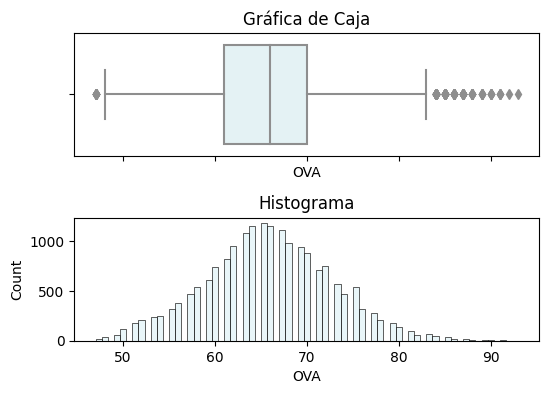

Mediana: 66.0
Media: 65.71804194330277
Desviación Estándar: 6.968701407468673
Mínimo: 47
Máximo: 93


In [ ]:
box_hist(df, 'OVA')
stats(df, 'OVA')

Que luce razonable, como una distribución normal con una ligera asimetría negativa.

## Columna 'POT'

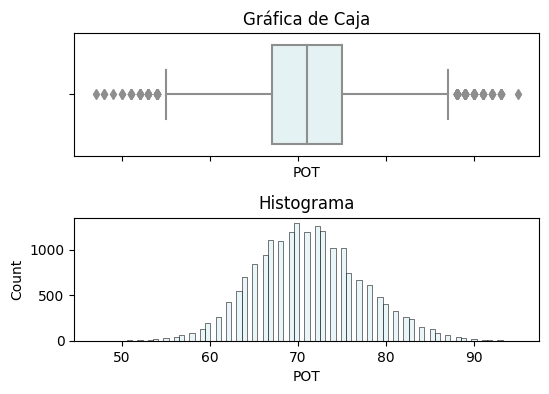

Mediana: 71.0
Media: 71.13578880809358
Desviación Estándar: 6.114189227868881
Mínimo: 47
Máximo: 95


In [ ]:
box_hist(df, 'POT')
stats(df, 'POT')

## Columna 'Team & Contract'

In [ ]:
df[['Full_name', 'Team & Contract']].head()

,Full_name,Team & Contract
0,Lionel Messi,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1,Cristiano Ronaldo dos Santos Aveir,\n\n\n\nJuventus\n2018 ~ 2022\n\n
2,Jan Oblak,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3,Kevin De Bruyne,\n\n\n\nManchester City\n2015 ~ 2023\n\n
4,Neymar da Silva Santos Jr.,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n


### Eliminando carácteres inecesarios

In [ ]:
len(df['Team & Contract'].unique())

9023

In [ ]:
df['Team & Contract'] = df['Team & Contract'].apply(lambda x: x.replace("\n", '')) 

In [ ]:
len(df['Team & Contract'].unique())

9023

### Separar el nombre del equipo y el años

In [ ]:
import re

def get_team(row):
  patter = r"\d{4} ~ \d{4}"
  matche = re.search(patter, row)
  if matche:
    return row[0:matche.start()]
  else:
    return row

def get_year_start(row):
  patter = r"\d{4} ~ \d{4}"
  matche = re.search(patter, row)
  if matche:
    return row[matche.start():-1].split('~')[0]
  else:
    return row

def get_year_end(row):
  patter = r"\d{4} ~ \d{4}"
  matche = re.search(patter, row)
  if matche:
    return row[matche.start():].split('~')[1]
  else:
    return row


In [ ]:
df['Team'] = df['Team & Contract'].apply(get_team)
df['Year_start'] = df['Team & Contract'].apply(get_year_start)
df['Year_end'] = df['Team & Contract'].apply(get_year_end)

In [ ]:
df[['Full_name', 'Team', 'Team & Contract', 'Year_start', 'Year_end']].head()

,Full_name,Team,Team & Contract,Year_start,Year_end
0,Lionel Messi,FC Barcelona,FC Barcelona2004 ~ 2021,2004,2021
1,Cristiano Ronaldo dos Santos Aveir,Juventus,Juventus2018 ~ 2022,2018,2022
2,Jan Oblak,Atlético Madrid,Atlético Madrid2014 ~ 2023,2014,2023
3,Kevin De Bruyne,Manchester City,Manchester City2015 ~ 2023,2015,2023
4,Neymar da Silva Santos Jr.,Paris Saint-Germain,Paris Saint-Germain2017 ~ 2022,2017,2022


### Revisar casos excepcionales

In [ ]:
patter = r"\d{4} ~ \d{4}"
df[['Full_name','Team & Contract']].loc[~df['Team & Contract'].str.contains(patter)]

,Full_name,Team & Contract
205,Gareth Bale,"Tottenham HotspurJun 30, 2021 On Loan"
250,Danilo Luís Hélio Pereira,"Paris Saint-GermainJun 30, 2021 On Loan"
257,Alphonse Areola,"FulhamJun 30, 2021 On Loan"
288,Welington Kauê Dano Nascimento,BrazilFree
292,Juan Everton Mestres de Mesquita,BrazilFree
...,...,...
18496,Moudi Najjar,"Macarthur FCAug 31, 2021 On Loan"
18568,Yubiao Deng,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan"
18579,Arthur Read,"StevenageJun 30, 2021 On Loan"
18637,Pu Chen,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan"


En general, las filas que no se ajustaron al patrón anterior son los jugadores libres o en prestamo. Entonces, actualizaremos sis equipos. En los años de los jugadores en prestamo agregaremos el año de inicio y como año final un valor nulo. Mientras que los jugadores libre serán nulo en ambos casos. Además, crearemos una nueva columna que clasifique a los jugadores según estén activos, en prestamo o libres

In [ ]:
def get_year_start_onloan(row):
  patter = r"On Loan"
  matche = re.search(patter, row)
  if matche:
    return row.split(' ')[-3]
  else:
    return row

def get_year_end_onloan(row):
  patter = r"On Loan"
  matche = re.search(patter, row)
  if matche:
    return None
  else:
    return row

def get_team_onloan(row):
  patter = r"On Loan"
  matche = re.search(patter, row)
  if matche:
    return row.split(', ')[0][0:-6]
  else:
    return row

In [ ]:
test = df['Team & Contract'].iloc[288]
test

' BrazilFree'

In [ ]:
get_team_free(test)

' Brazil'

In [ ]:
def get_year_start_free(row):
  patter = r"Free"
  matche = re.search(patter, row)
  if matche:
    return None
  else:
    return row
def get_year_end_free(row):
  patter = r"Free"
  if row !=None:
    matche = re.search(patter, row)
    if matche:
      return None
    else:
      return row
  else:
    return None

def get_team_free(row):
  patter = r"Free"
  matche = re.search(patter, row)
  if matche:
    return row.split('Free')[0]
  else:
    return row

In [ ]:
patter = r'On Loan'
df['Team']=\
df['Team'].apply(lambda x: get_team_onloan(x) if re.search(patter, x) else x)
patter = r'Free'
df['Team']=\
df['Team'].apply(lambda x: get_team_free(x) if re.search(patter, x) else x)

In [ ]:
patter = r'On Loan'
df['Year_start']=\
df['Year_start'].apply(lambda x: get_year_start_onloan(x) if re.search(patter, x) else x)
patter = r'Free'
df['Year_start']=\
df['Year_start'].apply(lambda x: get_year_start_free(x) if re.search(patter, x) else x)

In [ ]:
patter = r'On Loan'
df['Year_end']=\
df['Year_end'].apply(lambda x: get_year_end_onloan(x) if x is not None and re.search(patter, x) else x)
patter = r'Free'
df['Year_end']=\
df['Year_end'].apply(lambda x: get_year_end_free(x) if x is not None and re.search(patter, x) else x)

In [ ]:
patter = r"\d{4} ~ \d{4}"
df[['Full_name','Team & Contract', 'Team']].loc[~df['Team & Contract'].str.contains(patter)]

,Full_name,Team & Contract,Team
205,Gareth Bale,"Tottenham HotspurJun 30, 2021 On Loan",Tottenham Hotspur
250,Danilo Luís Hélio Pereira,"Paris Saint-GermainJun 30, 2021 On Loan",Paris Saint-Germain
257,Alphonse Areola,"FulhamJun 30, 2021 On Loan",Fulham
288,Welington Kauê Dano Nascimento,BrazilFree,Brazil
292,Juan Everton Mestres de Mesquita,BrazilFree,Brazil
...,...,...,...
18496,Moudi Najjar,"Macarthur FCAug 31, 2021 On Loan",Macarthur FC
18568,Yubiao Deng,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan",Shijiazhuang Ever Bright F.C.
18579,Arthur Read,"StevenageJun 30, 2021 On Loan",Stevenage
18637,Pu Chen,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan",Shijiazhuang Ever Bright F.C.


In [ ]:
patter = r"\d{4} ~ \d{4}"
df[['Full_name','Team & Contract', 'Team', 'Year_start', 'Year_end']].loc[~df['Team & Contract'].str.contains(patter)]

,Full_name,Team & Contract,Team,Year_start,Year_end
205,Gareth Bale,"Tottenham HotspurJun 30, 2021 On Loan",Tottenham Hotspur,2021,None
250,Danilo Luís Hélio Pereira,"Paris Saint-GermainJun 30, 2021 On Loan",Paris Saint-Germain,2021,None
257,Alphonse Areola,"FulhamJun 30, 2021 On Loan",Fulham,2021,None
288,Welington Kauê Dano Nascimento,BrazilFree,Brazil,None,None
292,Juan Everton Mestres de Mesquita,BrazilFree,Brazil,None,None
...,...,...,...,...,...
18496,Moudi Najjar,"Macarthur FCAug 31, 2021 On Loan",Macarthur FC,2021,None
18568,Yubiao Deng,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan",Shijiazhuang Ever Bright F.C.,2020,None
18579,Arthur Read,"StevenageJun 30, 2021 On Loan",Stevenage,2021,None
18637,Pu Chen,"Shijiazhuang Ever Bright F.C.Dec 31, 2020 On Loan",Shijiazhuang Ever Bright F.C.,2020,None


### Revisar si existen otros casos además de los considerados

In [ ]:
patter1 = r"\d{4} ~ \d{4}"
patter2 = r"On Loan"
patter3 = r"Free"

df[['Full_name','Team & Contract', 'Team']].loc[~(df['Team & Contract'].str.contains(patter1) |
                                                df['Team & Contract'].str.contains(patter2) |
                                                df['Team & Contract'].str.contains(patter3))]

,Full_name,Team & Contract,Team


### Convertir en tipos adecuados las nuevas columnas

In [ ]:
df[['Team', 'Year_start', 'Year_end']].dtypes

Team          object
Year_start    object
Year_end      object
dtype: object

Lo ideal es que las columnas para los años sean de tipo date. Sin embargo, no tenemos toda la información. Por lo que será útil tenerlo en tipo int para poder operar la diferencia de tiempo. Pero, no es lo mejor porque no podríamos tener valores nulos que expresan que no se conoce esos valores, pues lo rellenaría con 0 que no tienen sentido.

In [ ]:
patter = r"\d{4} ~ \d{4}"
df[['Full_name','Team & Contract', 'Team', 'Year_start', 'Year_end']].loc[df['Team & Contract'].str.contains(patter)]

,Full_name,Team & Contract,Team,Year_start,Year_end
0,Lionel Messi,FC Barcelona2004 ~ 2021,FC Barcelona,2004,2021
1,Cristiano Ronaldo dos Santos Aveir,Juventus2018 ~ 2022,Juventus,2018,2022
2,Jan Oblak,Atlético Madrid2014 ~ 2023,Atlético Madrid,2014,2023
3,Kevin De Bruyne,Manchester City2015 ~ 2023,Manchester City,2015,2023
4,Neymar da Silva Santos Jr.,Paris Saint-Germain2017 ~ 2022,Paris Saint-Germain,2017,2022
...,...,...,...,...,...
18973,Mengxuan Zhang,Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020,Chongqing Dangdai Lifan FC SWM Team,2020,2020
18974,Vani Da Silva,Oldham Athletic2020 ~ 2021,Oldham Athletic,2020,2021
18975,Ao Xia,Wuhan Zall2018 ~ 2022,Wuhan Zall,2018,2022
18976,Ben Hough,Oldham Athletic2020 ~ 2021,Oldham Athletic,2020,2021


### Crear columna de estado del jugador

In [ ]:
def status_player(row):
  if re.search(r"\d{4} ~ \d{4}", row):
    return "Active"
  if re.search(r"On Loan", row):
    return "On Loan"
  if re.search(r"Free", row):
    return "Free"

In [ ]:
df['status_player'] = df['Team & Contract'].apply(status_player)

### Crear columna de tiempo en el equipo

In [ ]:
df['Duration'] = pd.to_numeric(df['Year_end'], errors='coerce').sub(pd.to_numeric(df['Year_start'], errors='coerce'), fill_value= None)

In [ ]:
df['Duration']

0        17.0
1         4.0
2         9.0
3         8.0
4         5.0
         ... 
18973     0.0
18974     1.0
18975     4.0
18976     1.0
18977     4.0
Name: Duration, Length: 18978, dtype: float64

In [ ]:

df[['Full_name', 'Team', 'Year_start', 'Year_end', 'Duration']]

,Full_name,Team,Year_start,Year_end,Duration
0,Lionel Messi,FC Barcelona,2004,2021,17.0
1,Cristiano Ronaldo dos Santos Aveir,Juventus,2018,2022,4.0
2,Jan Oblak,Atlético Madrid,2014,2023,9.0
3,Kevin De Bruyne,Manchester City,2015,2023,8.0
4,Neymar da Silva Santos Jr.,Paris Saint-Germain,2017,2022,5.0
...,...,...,...,...,...
18973,Mengxuan Zhang,Chongqing Dangdai Lifan FC SWM Team,2020,2020,0.0
18974,Vani Da Silva,Oldham Athletic,2020,2021,1.0
18975,Ao Xia,Wuhan Zall,2018,2022,4.0
18976,Ben Hough,Oldham Athletic,2020,2021,1.0


## Columna 'Height'

Las alturas están expresadas en pies y pulgadas, y otras en sistema métrico internacional

In [ ]:
df[['Full_name','Height']].loc[df['Height'].str.contains(r"\d\'\d{1,2}\"")].head()

,Full_name,Height
0,Lionel Messi,"5'7"""
1,Cristiano Ronaldo dos Santos Aveir,"6'2"""
2,Jan Oblak,"6'2"""
3,Kevin De Bruyne,"5'11"""
4,Neymar da Silva Santos Jr.,"5'9"""


In [ ]:
df[['Full_name','Height']].loc[~df['Height'].str.contains(r"\d\'\d{1,2}\"")].head()

,Full_name,Height


In [ ]:
print("Cantidad en sistema inglés: {:d}".format(df['Height'].str.count(r"\d'\d{1,2}\"").sum()))
print("Cantidad en sistema internacional: {:d}".format(df['Height'].str.count(r"m").sum()))


Cantidad en sistema inglés: 18978
Cantidad en sistema internacional: 0


Parece que todos están en el mismo formato. Pero los queremos en sistema internacional donde el número represente la cantidad de centimetros

In [ ]:
test = df['Height'].iloc[1]
def to_cm(row):
  return 30.48* int(row.split("'")[0].replace("'",'').replace('"',"")) +\
      2.54* int(row.split("'")[1].replace("'",'').replace('"',""))

In [ ]:
df['Height'] = df['Height'].apply(to_cm)

In [ ]:
df[['Full_name','Height']]

,Full_name,Height
0,Lionel Messi,170.18
1,Cristiano Ronaldo dos Santos Aveir,187.96
2,Jan Oblak,187.96
3,Kevin De Bruyne,180.34
4,Neymar da Silva Santos Jr.,175.26
...,...,...
18973,Mengxuan Zhang,177.80
18974,Vani Da Silva,170.18
18975,Ao Xia,177.80
18976,Ben Hough,175.26


Para terminar podemos revisar si no hay valores extraños

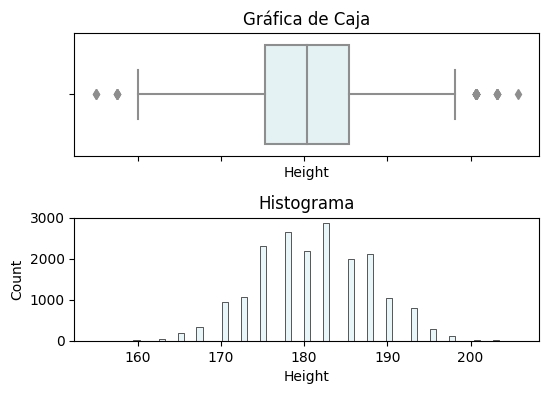

Mediana: 180.34
Media: 181.22454315523237
Desviación Estándar: 6.81895238618843
Mínimo: 154.94
Máximo: 205.74


In [ ]:
box_hist(df,'Height')
stats(df, 'Height')

## Columna 'Weight'

El objetivo de la columna peso es también pasarla al sistema métrico internacional. Donde todos los datos están en el sistema inglés

In [ ]:
df['Weight'].str.count(r"lbs").sum()

18978

In [ ]:
df['Weight'] = df['Weight'].apply(lambda x: int(x.replace('lbs','')) * 0.453592 )

In [ ]:
df[['Full_name', 'Height','Weight']].head()

,Full_name,Height,Weight
0,Lionel Messi,170.18,72.121128
1,Cristiano Ronaldo dos Santos Aveir,187.96,83.007336
2,Jan Oblak,187.96,87.089664
3,Kevin De Bruyne,180.34,69.853168
4,Neymar da Silva Santos Jr.,175.26,68.038800


## Columna 'foot'

Solo por curiosidad, ¿cuál es la cantidad de jugadores diestros y zurdos?

In [ ]:
df['foot'].value_counts(normalize=True)

Right    0.761092
Left     0.238908
Name: foot, dtype: float64

Es muy interesante porque el promedio de las personas zuerdas en el planeta oscila entre 10% a 12&. En el caso de los futbolistas, la proporción de zurdos es el doble.

## Columna 'BOV'

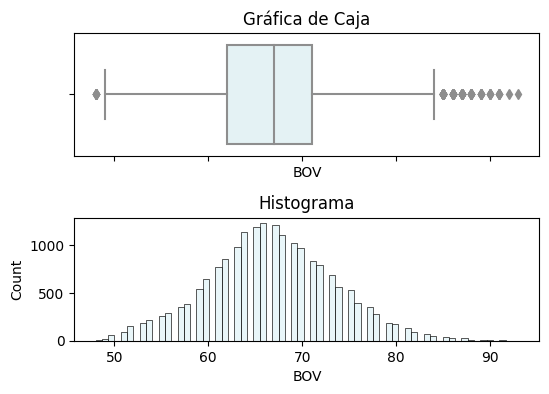

Mediana: 67.0
Media: 66.75108019812414
Desviación Estándar: 6.746784974412591
Mínimo: 48
Máximo: 93


In [ ]:
box_hist(df, 'BOV')
stats(df, 'BOV')

## Columna 'BP'

Significa que el orden de las posiciones en 'Positions' no representaba cuál es mejor que las demás para cada jugador. Solo resta comprobar que efectivamente "BP" se encuentra en una de las posiciones. Y cambiar el nombre de "Best_position" a "First_pos" y cambiar "BP" a "Best_position".

In [ ]:
df[['Best_position','BP']]

,Best_position,BP
0,RW,RW
1,ST,ST
2,GK,GK
3,CAM,CAM
4,LW,LW
...,...,...
18973,CB,CB
18974,ST,CAM
18975,CB,CB
18976,CM,CAM


In [ ]:
df['BP'].str.contains(df['Positions'].values[0]).sum()

0

In [ ]:
df = df.rename(columns={'Best_position':'First_position', 'BP': 'Best_position'})

Y falta cambiar 'Full_position' para la mejor posición

In [ ]:
df['Full_position'] = df['Best_position'].map(name_pos)

In [ ]:
# df.to_csv('cheakpoint16c.csv', index=False)

## Columna Growth

In [ ]:
df['Growth'].unique()

array([ 0,  2,  5,  1,  3,  6,  8,  7,  4, 12, 13, 11,  9, 10, 14, 16, 15,
       17, 18, 19, 20, 21, 22, 26, 23, 25, 24])

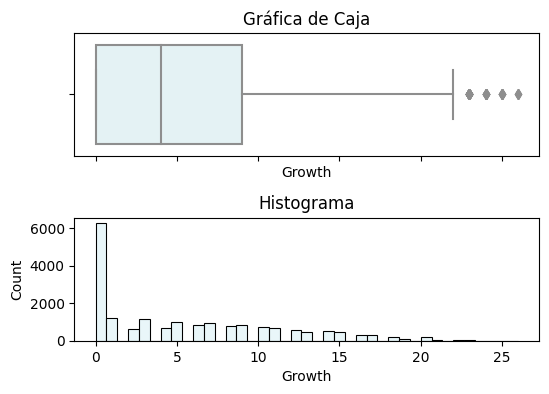

Mediana: 4.0
Media: 5.417746864790811
Desviación Estándar: 5.663967155841691
Mínimo: 0
Máximo: 26


In [ ]:
box_hist(df, 'Growth')
stats(df, 'Growth')

In [ ]:
df[['Full_name', 'Growth', 'Age']]

,Full_name,Growth,Age
0,Lionel Messi,0,33
1,Cristiano Ronaldo dos Santos Aveir,0,35
2,Jan Oblak,2,27
3,Kevin De Bruyne,0,29
4,Neymar da Silva Santos Jr.,0,28
...,...,...,...
18973,Mengxuan Zhang,5,21
18974,Vani Da Silva,20,17
18975,Ao Xia,8,21
18976,Ben Hough,20,17


Por lo que encontré este dato corresponde al crecimiento esperado para el jugador. Por eso, Lionel Messi tiene un valor de cero, porque está en su punto más alto. Mientras jugadores más jovenes tienden a tener mejor valor de crecimiento

## Columna 'Joined'

In [ ]:
df['Joined'] = pd.to_datetime(df['Joined'], format='%b %d, %Y')

In [ ]:
df[['Full_name', 'Joined', 'Year_start', 'Year_end']].head()

,Full_name,Joined,Year_start,Year_end
0,Lionel Messi,2004-07-01,2004,2021
1,Cristiano Ronaldo dos Santos Aveir,2018-07-10,2018,2022
2,Jan Oblak,2014-07-16,2014,2023
3,Kevin De Bruyne,2015-08-30,2015,2023
4,Neymar da Silva Santos Jr.,2017-08-03,2017,2022


Sería interesante ver cuáles meses son en los que más jugadores se unen a sus equipos

In [ ]:
df['Joined_month'] = df['Joined'].dt.month
df['Joined_day'] = df['Joined'].dt.day

In [ ]:
df[['Full_name', 'Joined', 'Joined_month', 'Joined_day', 'Year_start']].head()

,Full_name,Joined,Joined_month,Joined_day,Year_start
0,Lionel Messi,2004-07-01,7,1,2004
1,Cristiano Ronaldo dos Santos Aveir,2018-07-10,7,10,2018
2,Jan Oblak,2014-07-16,7,16,2014
3,Kevin De Bruyne,2015-08-30,8,30,2015
4,Neymar da Silva Santos Jr.,2017-08-03,8,3,2017


## Columna 'Loan Date End'

In [ ]:
df['Loan Date End'].loc[df['Loan Date End'].notnull()]

205      Jun 30, 2021
250      Jun 30, 2021
257      Jun 30, 2021
299      Jun 30, 2021
305      Jun 30, 2021
             ...     
18496    Aug 31, 2021
18568    Dec 31, 2020
18579    Jun 30, 2021
18637    Dec 31, 2020
18695    Dec 31, 2020
Name: Loan Date End, Length: 1013, dtype: object

In [ ]:
df['Loan Date End'].notnull().sum()

1013

Esto puede complementar la columna 'Year_end'. Y se puede extraer el día y el mes, donde se ve una tendencia a los días últimos e mes y preferentemente diciembre o junio.
Y cuando se normalice la tabla, será mejor tener esta información en una tabla por separado.

## Columna 'Value'

Hay que convertir la cantidad a tipo entero, cambiando la abreciatura por su equivalente y retirar el símbolo de euros

In [ ]:
df['Value'].head()

0    €67.5M
1      €46M
2      €75M
3      €87M
4      €90M
Name: Value, dtype: object

In [ ]:
def to_euros(row):
  row = row.replace("€","")
  if 'M' in row:
    return float(row.replace("M", '')) *1000000
  if 'K' in row:
    return float(row.replace("K", '')) *1000
  else:
    return float(row)

In [ ]:
df['Value'] = df['Value'].apply(to_euros)

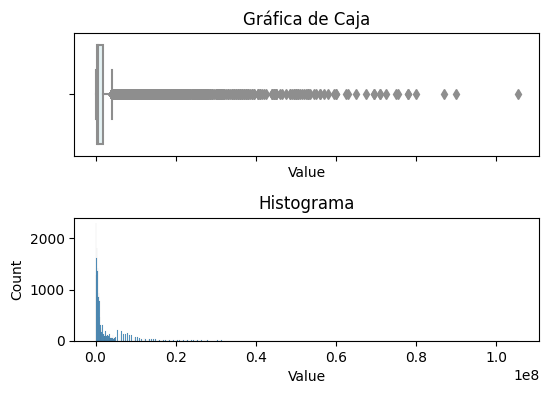

Mediana: 650000.0
Media: 2258585.3176721837
Desviación Estándar: 5124862.865424284
Mínimo: 5000.0
Máximo: 105500000.0


In [ ]:
box_hist(df, 'Value')
stats(df, 'Value')

Es muy interesante ver como la mayoria gana muy poco y unos cuantos ganan mucho. Esto es una distribucion de Pareto que ejemplifica muy bien la idea del libro freakonomics donde el trabajo de los futbolistas es como el de los traficantes, los cuales atraen a muchos por la fama y la promesa de las ganancias, cuando en realidad son muy pocos los que se vuelve millonarios

## Columna 'Wage'

Es el caso identico a 'Value'

In [ ]:
df['Wage'] = df['Wage'].apply(to_euros)

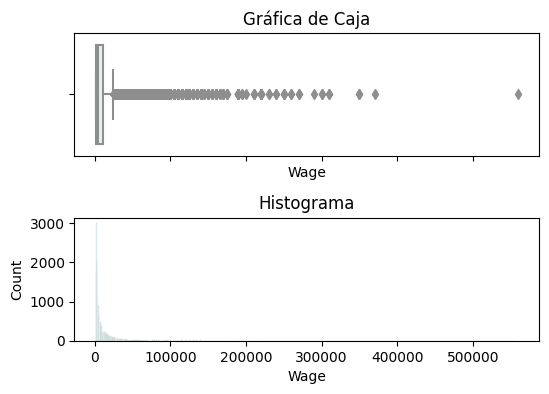

Mediana: 4000.0
Media: 11103.953049109552
Desviación Estándar: 21549.005333603218
Mínimo: 1000.0
Máximo: 560000.0


In [ ]:
box_hist(df, 'Wage')
stats(df, 'Wage')

## Columna 'Release Clause'

In [ ]:
df['Release Clause'] = df['Release Clause'].apply(to_euros)

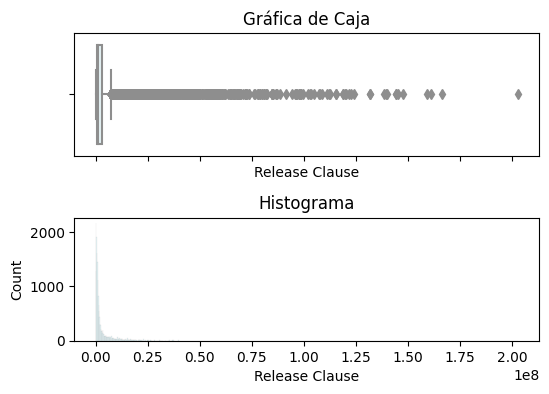

Mediana: 1100000.0
Media: 4243932.55065756
Desviación Estándar: 10054492.808241377
Mínimo: 9000.0
Máximo: 203100000.0


In [ ]:
box_hist(df, 'Release Clause')
stats(df, 'Release Clause')

## Columna 'Attacking'

In [ ]:
df['Attacking'].nunique()

367

In [ ]:
df['Attacking'].dtype

dtype('int64')

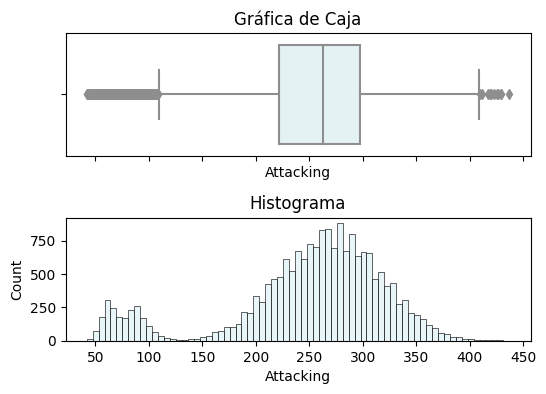

Mediana: 263.0
Media: 248.93560965328274
Desviación Estándar: 74.30056687552782
Mínimo: 42
Máximo: 437


In [ ]:
box_hist(df, 'Attacking')
stats(df, 'Attacking')

Lo cual tiene sentido si pensamos que las habilidades de  los porteros diferieren bastante de los defensas, medios y delanteros. Los tres ultimos comparten mas razgos en comun, por lo que deben ser la distribucion normal mas grande. Mientras la distribucion mas peque;a debe corresponder a los porteros que no suelen atacar.

Tengo la teoria que decidieron ampliar el rango para attacking porque las estadisticas de los jugadores son numeros enteros, entonces para poder ordenar correctamente a los porteros sin agregar puntos decimales el rango es mas de 400.

## Columnas de estadisticas

La mayoria de las proximas columnas son estadisticas de los jugadores, todas tienen tipo int64. Entonces, iterare en los nombres de las columnas e ire graficando sus distribuciones para poder revisarlas

# Columna Crossing

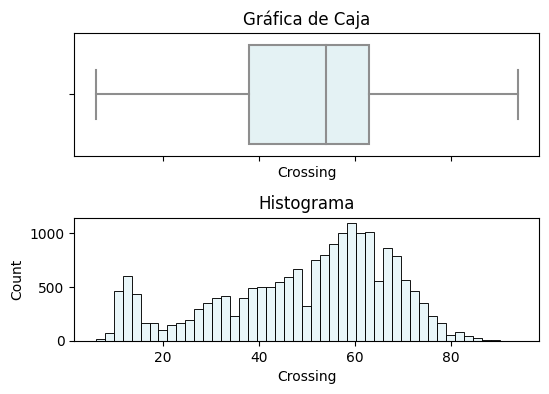

Mediana: 54.0
Media: 49.68737485509537
Desviación Estándar: 18.13108864216134
Mínimo: 6
Máximo: 94


# Columna Finishing

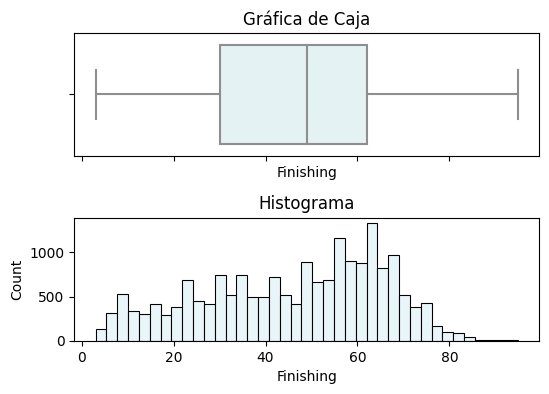

Mediana: 49.0
Media: 45.84287069238065
Desviación Estándar: 19.567491616605356
Mínimo: 3
Máximo: 95


# Columna Heading Accuracy

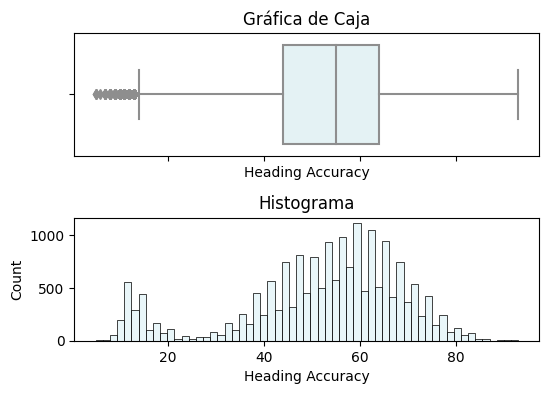

Mediana: 55.0
Media: 51.941458530930554
Desviación Estándar: 17.293982589946005
Mínimo: 5
Máximo: 93


# Columna Short Passing

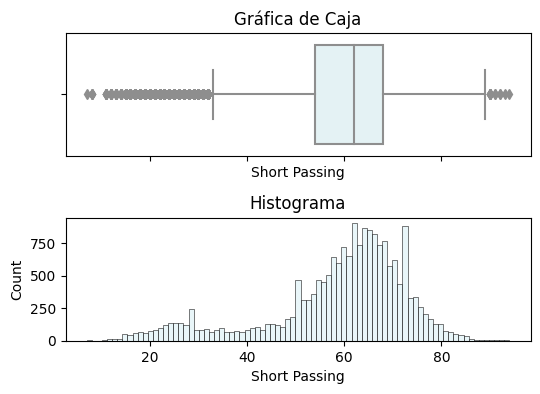

Mediana: 62.0
Media: 58.76725682369059
Desviación Estándar: 14.519010063786945
Mínimo: 7
Máximo: 94


# Columna Volleys

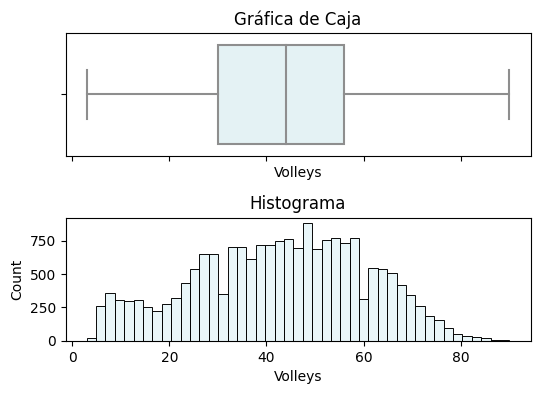

Mediana: 44.0
Media: 42.696648751185585
Desviación Estándar: 17.64739060172431
Mínimo: 3
Máximo: 90


# Columna Skill

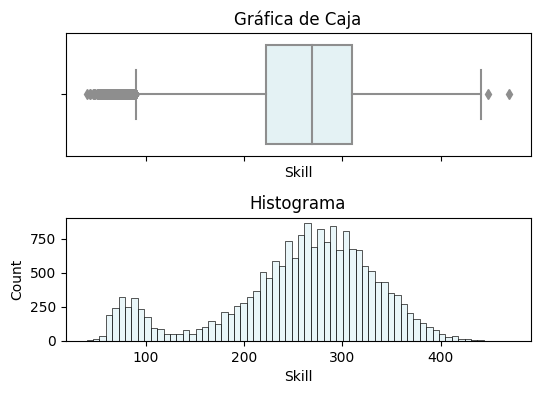

Mediana: 269.0
Media: 256.4769206449573
Desviación Estándar: 78.65203904939212
Mínimo: 40
Máximo: 470


# Columna Dribbling

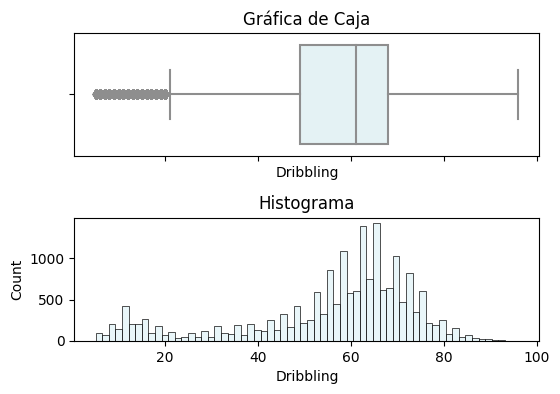

Mediana: 61.0
Media: 55.586890083254296
Desviación Estándar: 18.761625428676723
Mínimo: 5
Máximo: 96


# Columna Curve

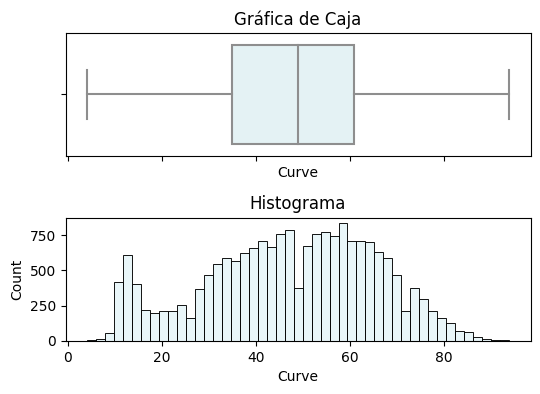

Mediana: 49.0
Media: 47.24665402044472
Desviación Estándar: 18.208222286393184
Mínimo: 4
Máximo: 94


# Columna FK Accuracy

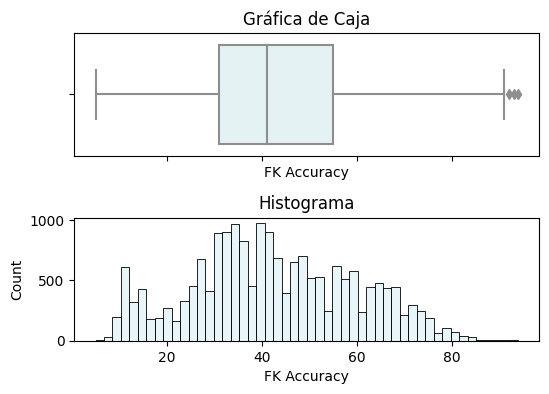

Mediana: 41.0
Media: 42.391400569079984
Desviación Estándar: 17.228317295203315
Mínimo: 5
Máximo: 94


# Columna Long Passing

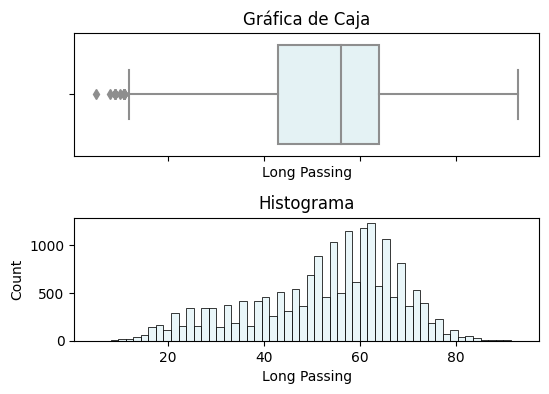

Mediana: 56.0
Media: 52.724206976499104
Desviación Estándar: 15.177689358784157
Mínimo: 5
Máximo: 93


# Columna Ball Control

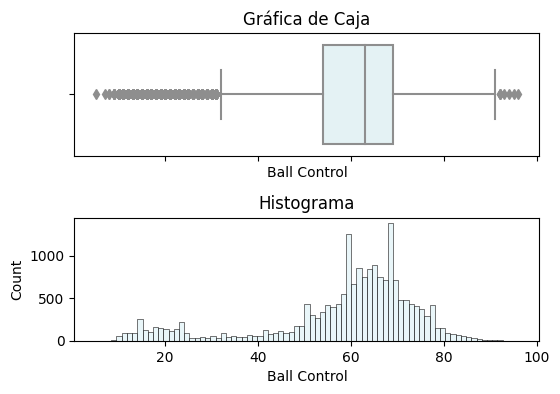

Mediana: 63.0
Media: 58.52776899567921
Desviación Estándar: 16.56611935767579
Mínimo: 5
Máximo: 96


# Columna Movement

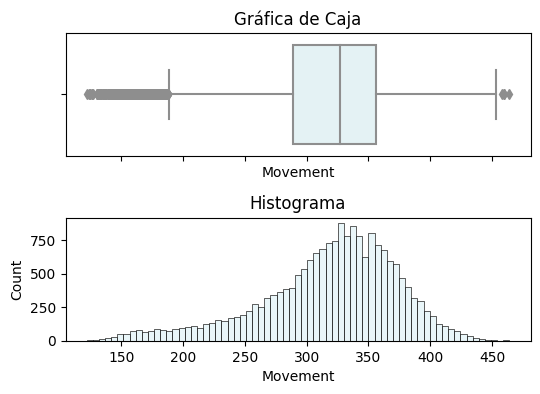

Mediana: 327.0
Media: 317.7168300137001
Desviación Estándar: 55.87993109222651
Mínimo: 122
Máximo: 464


# Columna Acceleration

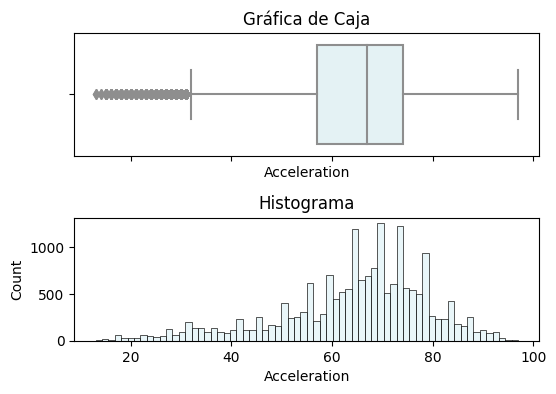

Mediana: 67.0
Media: 64.35725576983876
Desviación Estándar: 14.890317237919461
Mínimo: 13
Máximo: 97


# Columna Sprint Speed

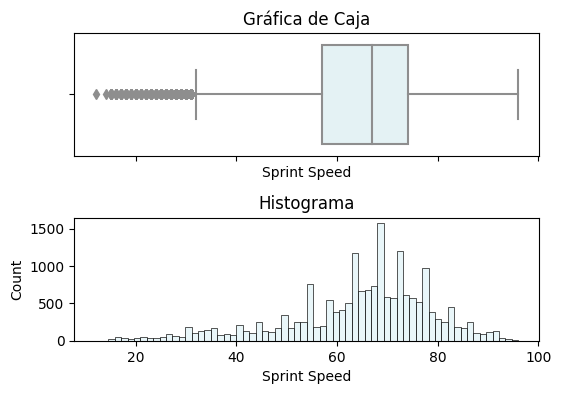

Mediana: 67.0
Media: 64.4123722204658
Desviación Estándar: 14.63892725685969
Mínimo: 12
Máximo: 96


# Columna Agility

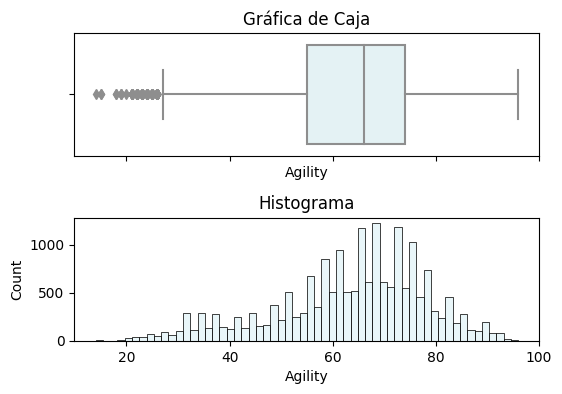

Mediana: 66.0
Media: 63.36642428074612
Desviación Estándar: 14.59660430097471
Mínimo: 14
Máximo: 96


# Columna Reactions

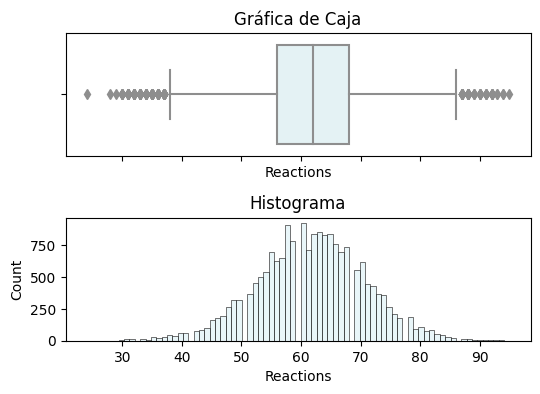

Mediana: 62.0
Media: 61.6548108335968
Desviación Estándar: 9.07166918707039
Mínimo: 24
Máximo: 95


# Columna Balance

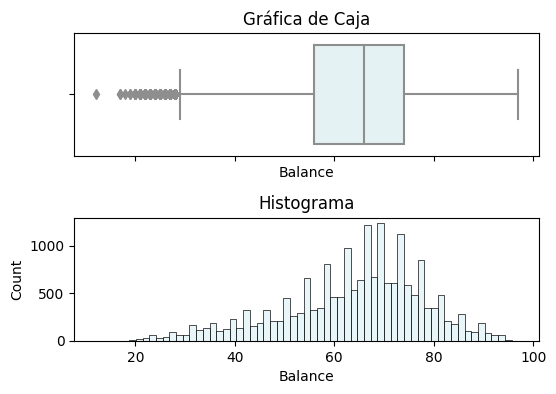

Mediana: 66.0
Media: 63.92596690905259
Desviación Estándar: 14.062648210634604
Mínimo: 12
Máximo: 97


# Columna Power

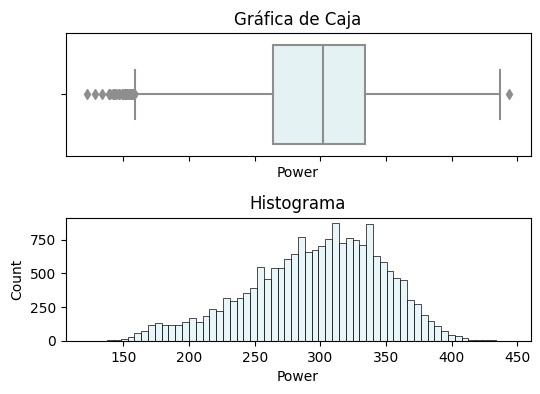

Mediana: 302.0
Media: 296.60406786805777
Desviación Estándar: 50.733488557864995
Mínimo: 122
Máximo: 444


# Columna Shot Power

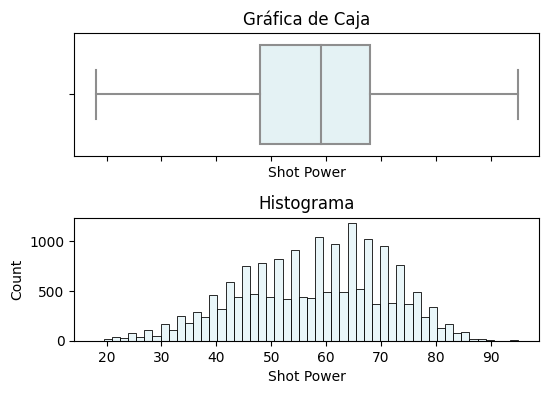

Mediana: 59.0
Media: 57.80182316366319
Desviación Estándar: 13.309082148894447
Mínimo: 18
Máximo: 95


# Columna Jumping

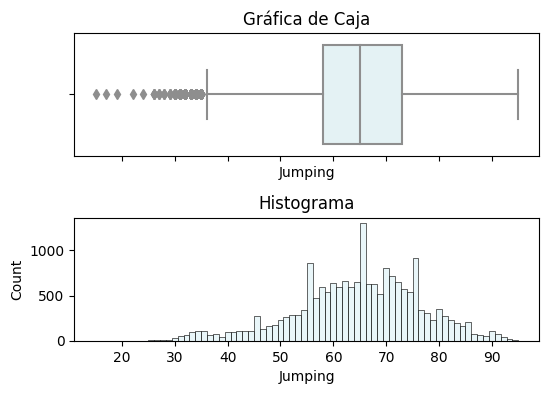

Mediana: 65.0
Media: 64.57672041310991
Desviación Estándar: 11.844838315212336
Mínimo: 15
Máximo: 95


# Columna Stamina

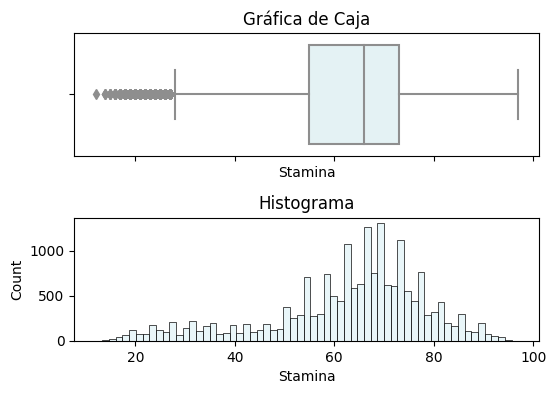

Mediana: 66.0
Media: 62.65349351881125
Desviación Estándar: 15.804493631168501
Mínimo: 12
Máximo: 97


# Columna Strength

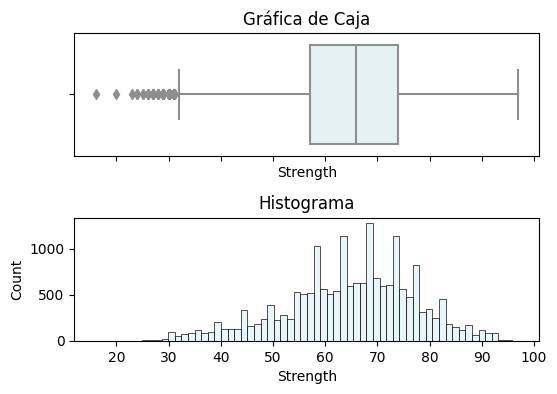

Mediana: 66.0
Media: 64.78654231215091
Desviación Estándar: 12.488891165151172
Mínimo: 16
Máximo: 97


# Columna Long Shots

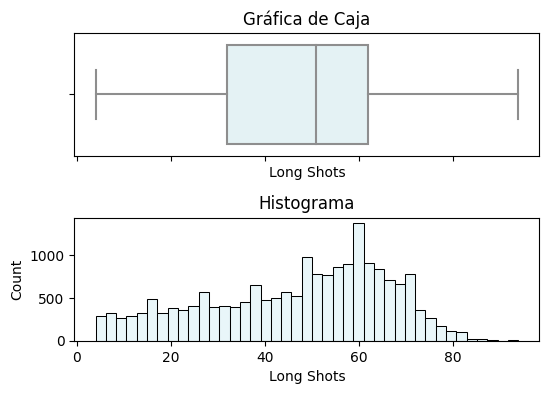

Mediana: 51.0
Media: 46.785488460322476
Desviación Estándar: 19.301011551894973
Mínimo: 4
Máximo: 94


# Columna Mentality

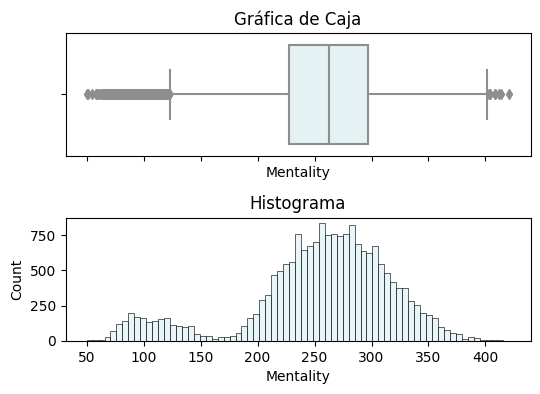

Mediana: 263.0
Media: 254.19675413636844
Desviación Estándar: 64.5959987804357
Mínimo: 50
Máximo: 421


# Columna Aggression

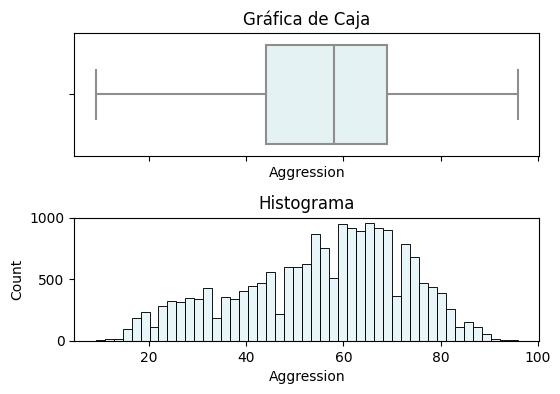

Mediana: 58.0
Media: 55.590051638739595
Desviación Estándar: 17.140023261806277
Mínimo: 9
Máximo: 96


# Columna Interceptions

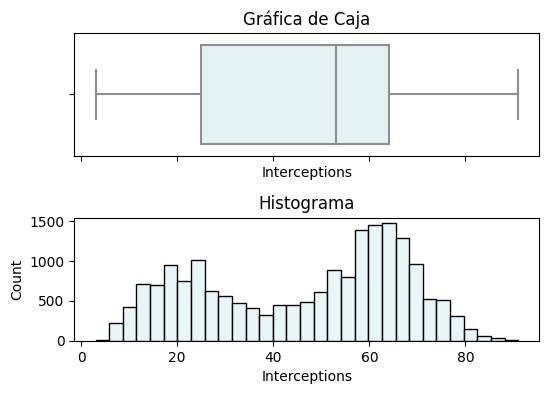

Mediana: 53.0
Media: 46.39282326904837
Desviación Estándar: 20.697352044349643
Mínimo: 3
Máximo: 91


# Columna Positioning

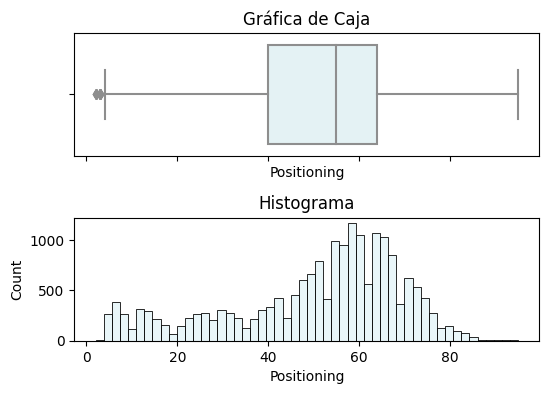

Mediana: 55.0
Media: 50.29887237854358
Desviación Estándar: 19.4292091039513
Mínimo: 2
Máximo: 95


# Columna Vision

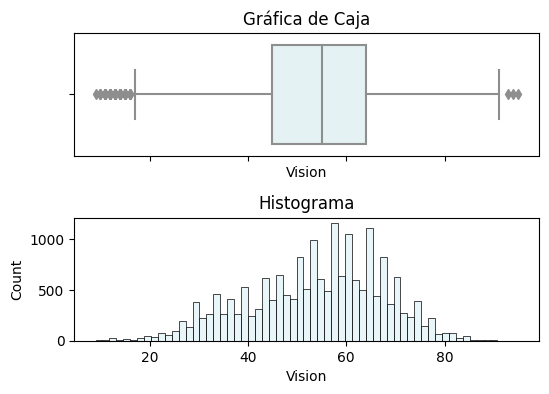

Mediana: 55.0
Media: 53.856676151333126
Desviación Estándar: 13.708807352073453
Mínimo: 9
Máximo: 95


# Columna Penalties

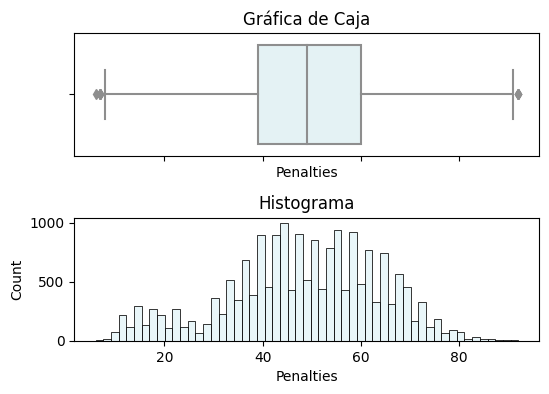

Mediana: 49.0
Media: 48.05833069870376
Desviación Estándar: 15.656302217345534
Mínimo: 6
Máximo: 92


# Columna Composure

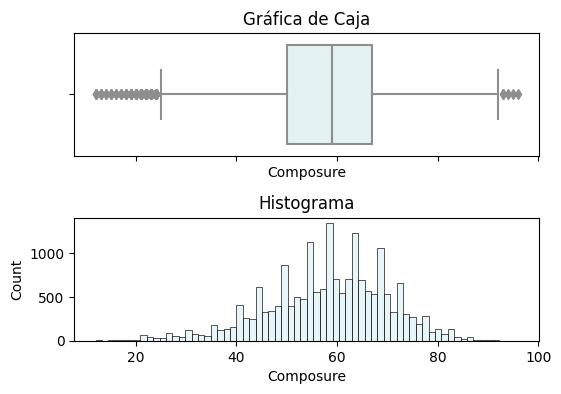

Mediana: 59.0
Media: 58.07282116134471
Desviación Estándar: 12.078874649240518
Mínimo: 12
Máximo: 96


# Columna Defending

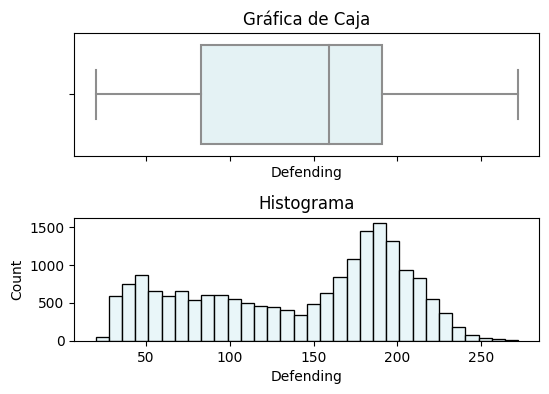

Mediana: 159.0
Media: 139.90425756138686
Desviación Estándar: 61.217193390514375
Mínimo: 20
Máximo: 272


# Columna Marking

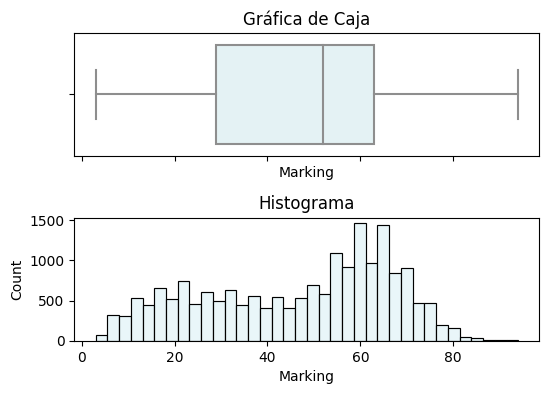

Mediana: 52.0
Media: 46.55754030983244
Desviación Estándar: 20.138561575423285
Mínimo: 3
Máximo: 94


# Columna Standing Tackle

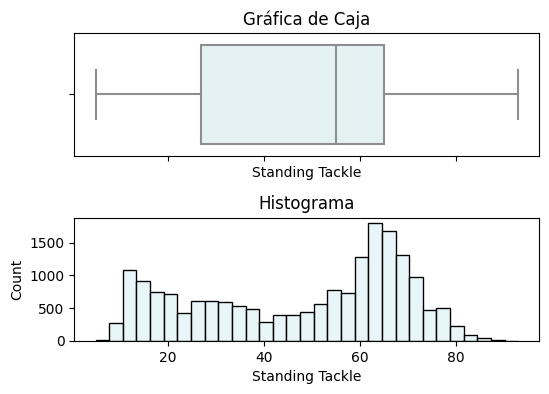

Mediana: 55.0
Media: 47.70392032880177
Desviación Estándar: 21.366966530109547
Mínimo: 5
Máximo: 93


# Columna Sliding Tackle

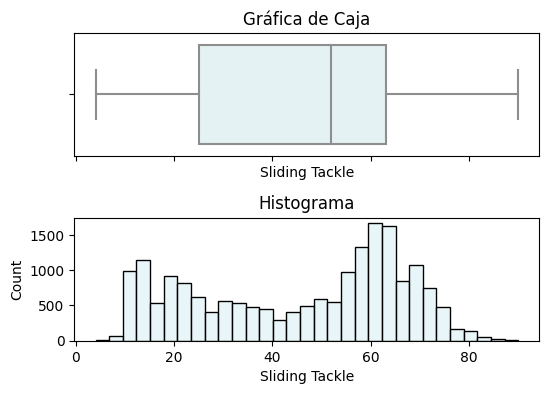

Mediana: 52.0
Media: 45.64279692275266
Desviación Estándar: 20.921400193428955
Mínimo: 4
Máximo: 90


# Columna Goalkeeping

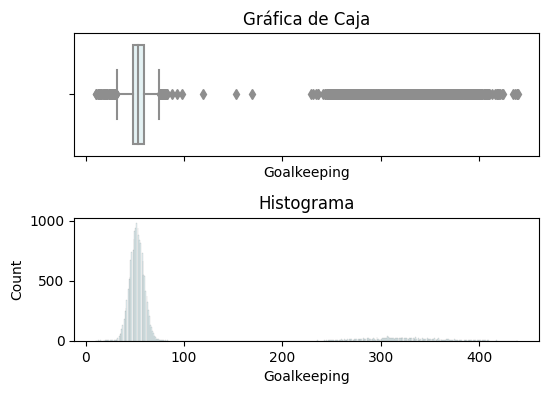

Mediana: 53.0
Media: 81.4379281273053
Desviación Estándar: 84.66763918846885
Mínimo: 10
Máximo: 440


# Columna GK Diving

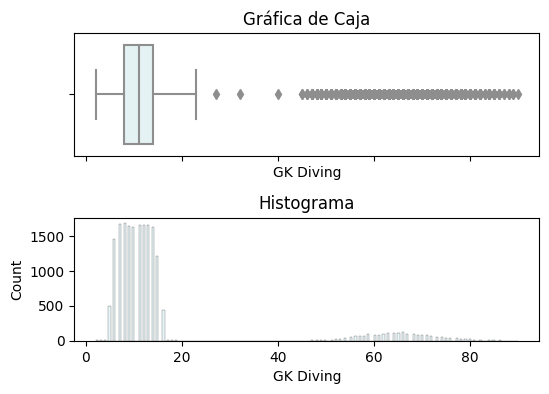

Mediana: 11.0
Media: 16.41648224259669
Desviación Estándar: 17.55463940438348
Mínimo: 2
Máximo: 90


# Columna GK Handling

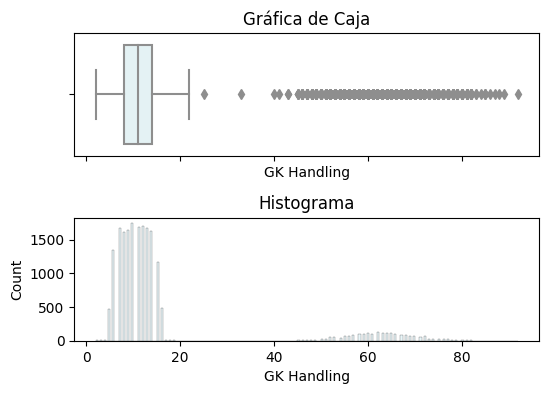

Mediana: 11.0
Media: 16.20734534724418
Desviación Estándar: 16.816720288431547
Mínimo: 2
Máximo: 92


# Columna GK Kicking

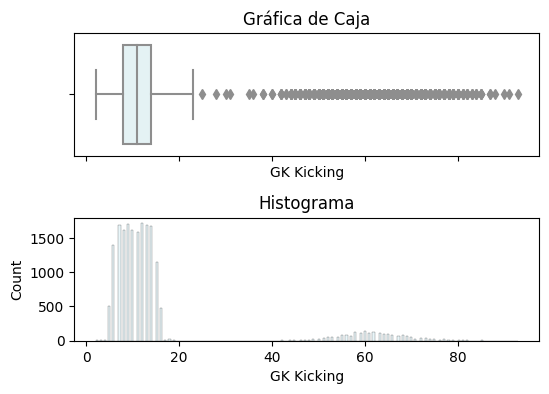

Mediana: 11.0
Media: 16.07682579829276
Desviación Estándar: 16.49145752699269
Mínimo: 2
Máximo: 93


# Columna GK Positioning

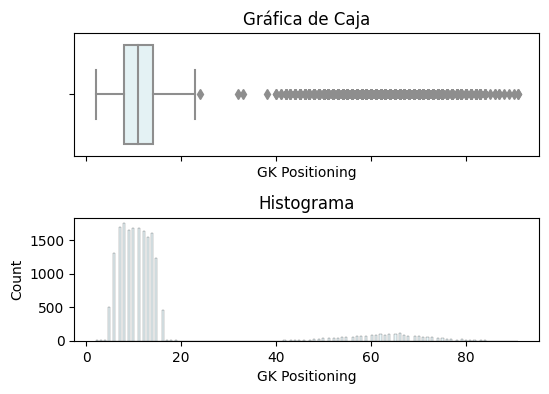

Mediana: 11.0
Media: 16.2176204025714
Desviación Estándar: 17.00258222988266
Mínimo: 2
Máximo: 91


# Columna GK Reflexes

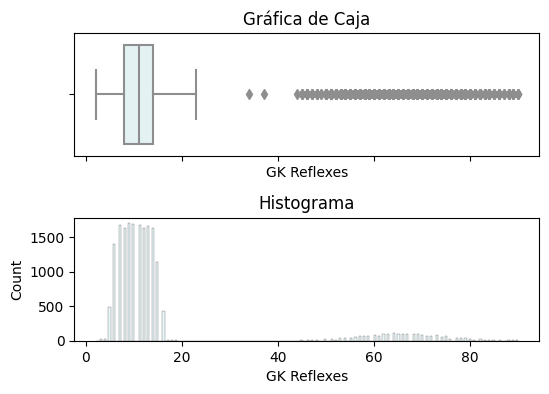

Mediana: 11.0
Media: 16.519654336600276
Desviación Estándar: 17.854548619594578
Mínimo: 2
Máximo: 90


# Columna Total Stats

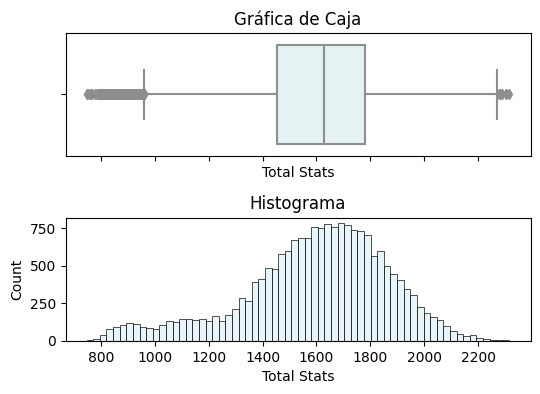

Mediana: 1627.0
Media: 1595.2723680050585
Desviación Estándar: 269.87442360765203
Mínimo: 747
Máximo: 2316


# Columna Base Stats

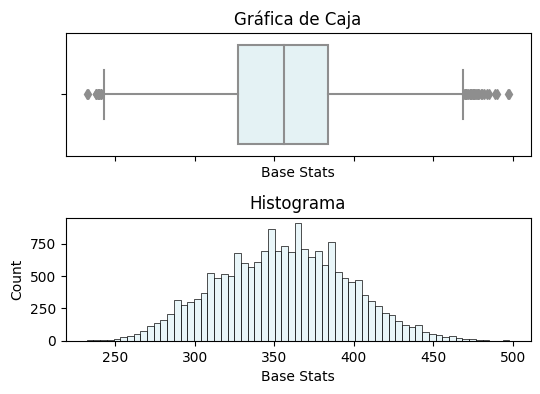

Mediana: 356.0
Media: 355.69965222889664
Desviación Estándar: 40.76068344550487
Mínimo: 232
Máximo: 498


# Columna PAC

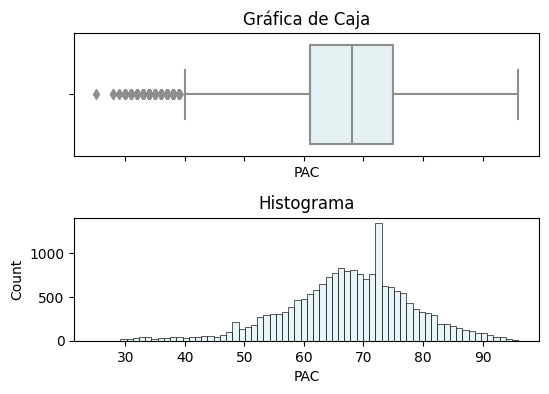

Mediana: 68.0
Media: 67.45368321214038
Desviación Estándar: 10.678064756862822
Mínimo: 25
Máximo: 96


# Columna SHO

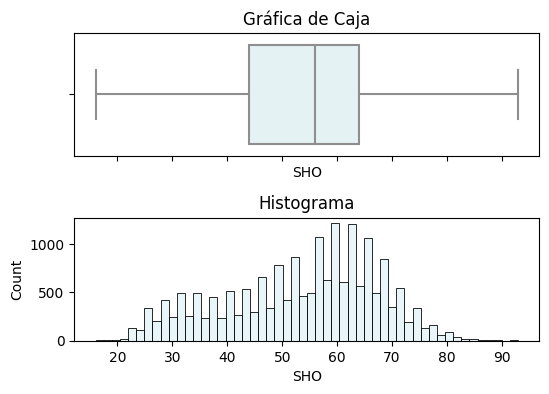

Mediana: 56.0
Media: 53.457582463905574
Desviación Estándar: 13.827581133150442
Mínimo: 16
Máximo: 93


# Columna PAS

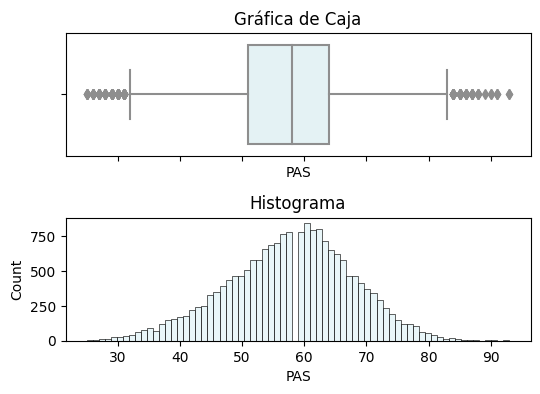

Mediana: 58.0
Media: 57.68047212561914
Desviación Estándar: 10.08184450936724
Mínimo: 25
Máximo: 93


# Columna DRI

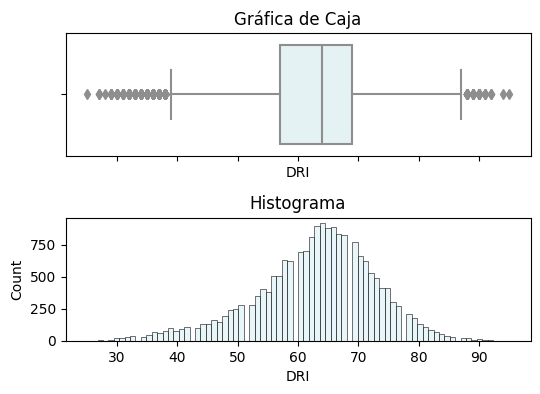

Mediana: 64.0
Media: 62.87474971019075
Desviación Estándar: 9.927606643399805
Mínimo: 25
Máximo: 95


# Columna DEF

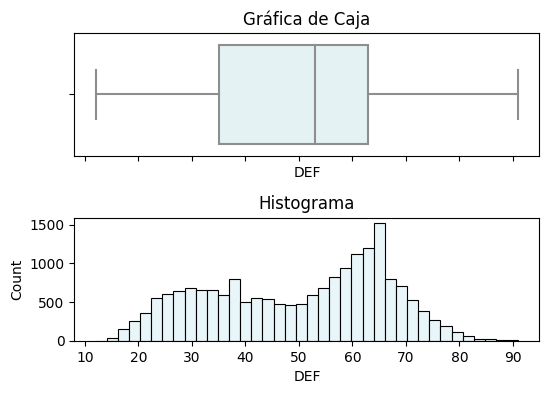

Mediana: 53.0
Media: 49.864738117820636
Desviación Estándar: 16.442377651335356
Mínimo: 12
Máximo: 91


# Columna PHY

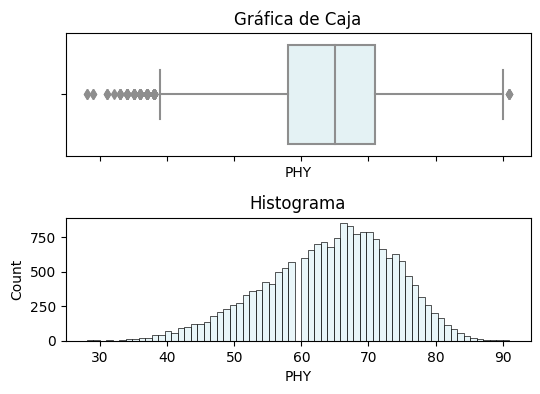

Mediana: 65.0
Media: 64.36842659922014
Desviación Estándar: 9.601881592498666
Mínimo: 28
Máximo: 91
Las columnas faltantes son:
0. W/F
1. SM
2. A/W
3. D/W
4. IR
5. Hits


In [ ]:
from IPython.display import Markdown

start = sc[sc['Columna'] == 'Crossing'].index[0]
res_col = []
for i in range(start, len(sc)):
  col = sc['Columna'].iloc[i]
  if df[col].dtype == 'int64':
    titulo = '# Columna ' + col
    display(Markdown(titulo))
    box_hist(df, col)
    stats(df, col)
  else:
    res_col.append(col)
print("Las columnas faltantes son:")
for i, col in enumerate(res_col):
  print(f"{i}. {col}")

La mayoria de las distribuciones luce razonable. En muchas de ellas se puede notar el subconjunto de porteros. Mientras en las estadisticas de porteros, ellos consiguen mejores puntuaciones, por lo que se ven dos distribuciones separadas. 

Algo que llama la atencion es como quedan construidos varios histogramas, los cuales tienen alternados bins con mas datos que el siguiente.

## Últimas columnas

In [ ]:
df[['Full_name', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits']]

,Full_name,W/F,SM,A/W,D/W,IR,Hits
0,Lionel Messi,4 ★,4★,Medium,Low,5 ★,\n372
1,Cristiano Ronaldo dos Santos Aveir,4 ★,5★,High,Low,5 ★,\n344
2,Jan Oblak,3 ★,1★,Medium,Medium,3 ★,\n86
3,Kevin De Bruyne,5 ★,4★,High,High,4 ★,\n163
4,Neymar da Silva Santos Jr.,5 ★,5★,High,Medium,5 ★,\n273
...,...,...,...,...,...,...,...
18973,Mengxuan Zhang,2 ★,2★,Low,Low,1 ★,2
18974,Vani Da Silva,2 ★,2★,Medium,Medium,1 ★,3
18975,Ao Xia,2 ★,2★,Medium,Medium,1 ★,3
18976,Ben Hough,2 ★,2★,Medium,Medium,1 ★,5


## Columnas 'W/F', 'SM' y 'IR'

Estas columnas son una puntuacion del 1 al 5. El problema que se representan con '★', lo que dificulta el analisis porque no se pueden tratar numericamente esas columnas. 

In [ ]:
def remove_star(col):
  return int(col.replace("★", "").strip())

In [ ]:
df['W/F'] = df['W/F'].apply(remove_star)
df['SM'] = df['SM'].apply(remove_star)
df['IR'] = df['IR'].apply(remove_star)

## Columna 'A/W' y 'D/W'

Expresa tres niveles

In [ ]:
df['A/W'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Para trabajar con estos datos podemos crear columnas dummies para las tres categorias. Pero como no haremos un analisis. Por ahora se puede quedar asi. O bien, pensarlo como niveles de habilidad del 1 al 3, similar a las estrellas.

In [ ]:
map_levels = {'Low': 1, 'Medium': 2, 'High': 3}
df['Level A/W'] = df['A/W'].map(map_levels)
df['Level D/W'] = df['D/W'].map(map_levels)

In [ ]:
df['Level D/W'].dtype

dtype('int64')

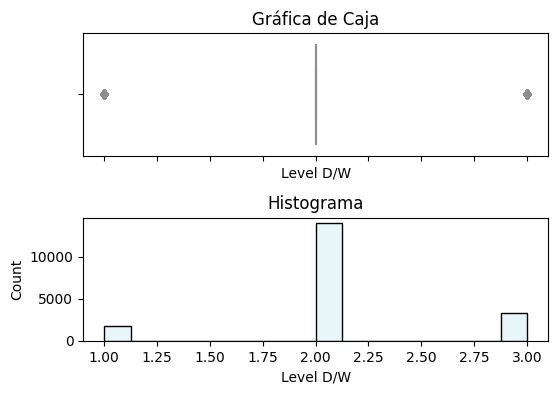

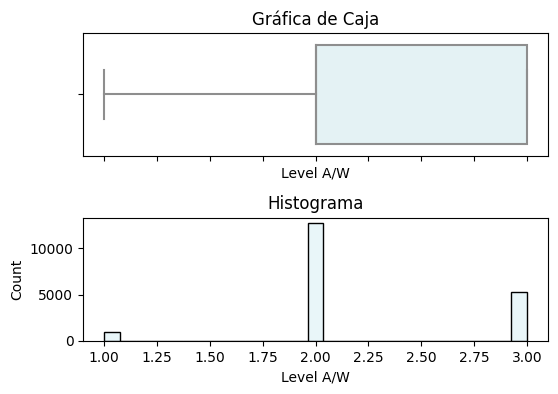

In [ ]:
box_hist(df, 'Level D/W')
box_hist(df, 'Level A/W')

## Columna 'Hits'

In [ ]:
df[['Full_name', 'Hits']]

,Full_name,Hits
0,Lionel Messi,\n372
1,Cristiano Ronaldo dos Santos Aveir,\n344
2,Jan Oblak,\n86
3,Kevin De Bruyne,\n163
4,Neymar da Silva Santos Jr.,\n273
...,...,...
18973,Mengxuan Zhang,2
18974,Vani Da Silva,3
18975,Ao Xia,3
18976,Ben Hough,5


In [ ]:
df['Hits'] = df['Hits'].astype(str)

In [ ]:
df['Hits'] = df['Hits'].apply(lambda x: x.replace('\n', ''))

In [ ]:
# Existen un par de valores que usan la abreciacion 'K', por lo que sera util usar la funcion para convertir a euros
df['Hits'] = df['Hits'].apply(to_euros)

In [ ]:
df['Hits'].dtype

dtype('float64')

## Guardar DataFrame resultante

In [ ]:
df.to_csv('checkpoint_fifa.csv', index=False)

# Normalizar la tabla

## Creacion de un diagrama para la base de datos

In [ ]:
cd drive/MyDrive/Kaggle_Projects/

In [ ]:
import pandas as pd
df = pd.read_csv('checkpoint_fifa.csv')

In [ ]:
df.head()

,photourl,longname,playerurl,nationality,positions,name,age,ova,pot,team_&_contract,...,team,year_start,year_end,status_player,duration,euros,level_a_w,level_d_w,player_id,defender
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,FC Barcelona,2004.0,2021.0,Active,17.0,67500000.0,2,1,1,278
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,Juventus,2018.0,2022.0,Active,4.0,46000000.0,3,1,2,263
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,Atlético Madrid,2014.0,2023.0,Active,9.0,75000000.0,2,2,3,182
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,Manchester City,2015.0,2023.0,Active,8.0,87000000.0,3,3,4,463
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,Paris Saint-Germain,2017.0,2022.0,Active,5.0,90000000.0,3,2,5,281


In [ ]:
columns = df.columns

In [ ]:
# print(*list(columns), sep='\n')
print(columns)
print(f'\n En total son {len(columns)} columnas')

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', 'OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'Best_position', 'Growth', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'P

Inicialmente eran 77 columnas, pero algunas las transforme para que fueran más utiles. El objetivo es agrupar las columnas para crear tablas más pequeñas.

En la mayoría de las columnas no se repiten datos, por lo que la normalización de la tabla estará enfocada en posibles usos, para eliminar columnas inecesarias como el url.

In [ ]:
df_t = df.iloc[:4,:]
df_t = df_t.transpose()
df_t

,0,1,2,3
photoUrl,https://cdn.sofifa.com/players/158/023/21_60.png,https://cdn.sofifa.com/players/020/801/21_60.png,https://cdn.sofifa.com/players/200/389/21_60.png,https://cdn.sofifa.com/players/192/985/21_60.png
LongName,Lionel Messi,C. Ronaldo dos Santos Aveiro,Jan Oblak,Kevin De Bruyne
playerUrl,http://sofifa.com/player/158023/lionel-messi/2...,http://sofifa.com/player/20801/c-ronaldo-dos-s...,http://sofifa.com/player/200389/jan-oblak/210005/,http://sofifa.com/player/192985/kevin-de-bruyn...
Nationality,Argentina,Portugal,Slovenia,Belgium
Positions,RW ST CF,ST LW,GK,CAM CM
...,...,...,...,...
status_player,Active,Active,Active,Active
Duration,17.0,4.0,9.0,8.0
euros,67500000.0,46000000.0,75000000.0,87000000.0
Level A/W,2,3,2,3


Despues de analizar las columnas y su interpretacion se construyo el siguiente diagrama que separa las funciones de las columnas para representar un aspecto clave de cada jugador: https://dbdiagram.io/d/647281ad7764f72fcff5d11b 

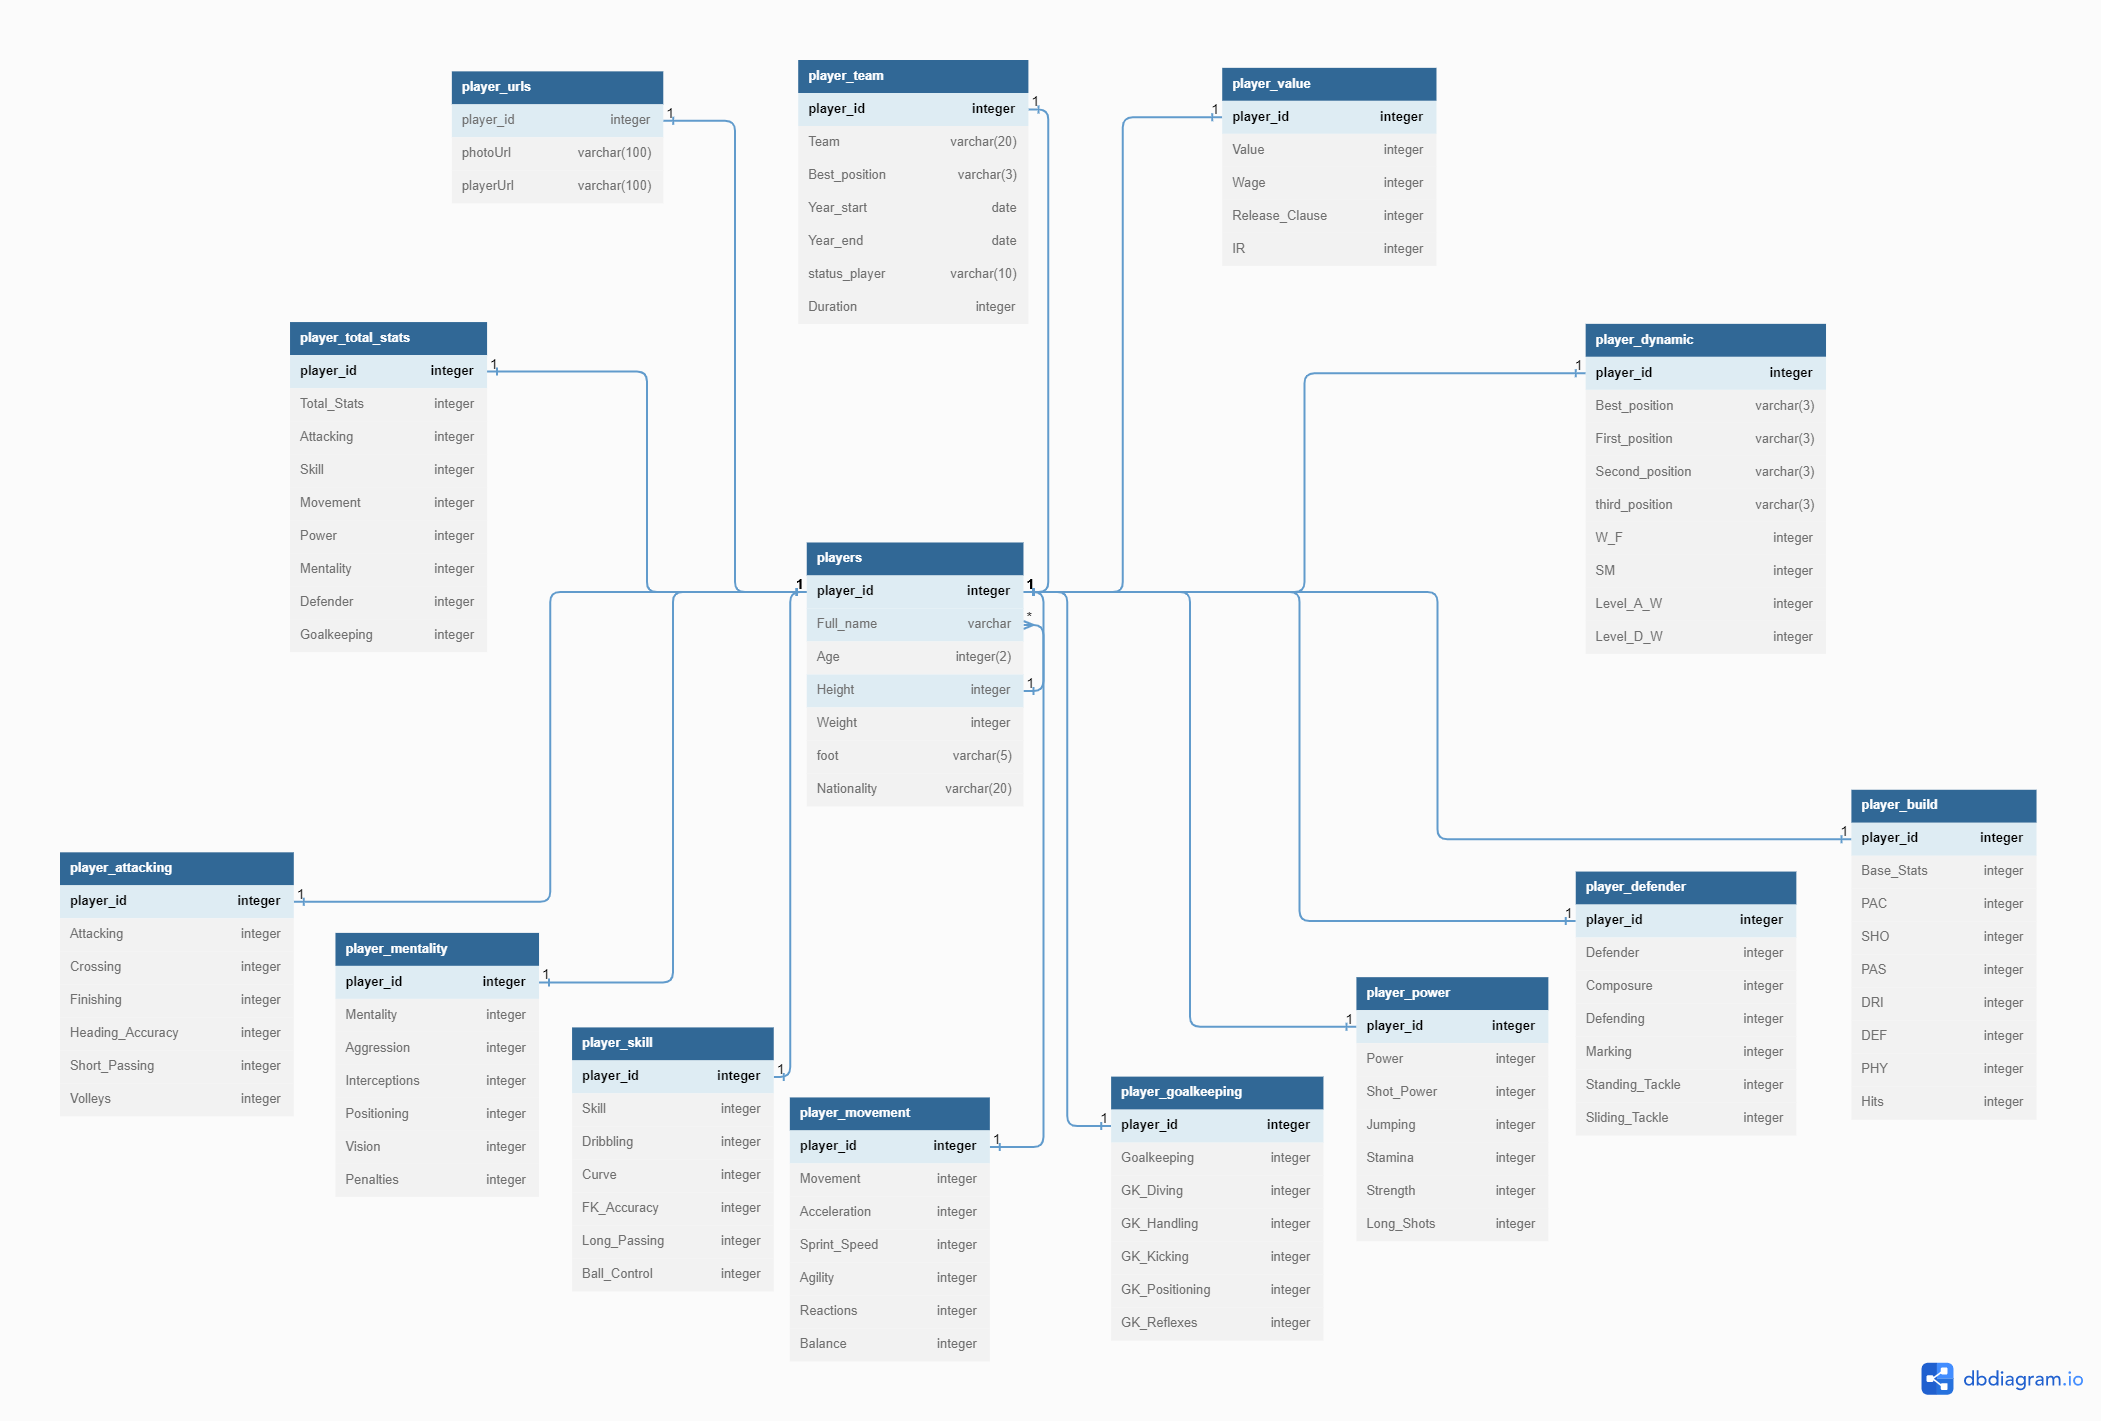

Pero hacen falta dos columnas.

- player_id permitira relacionar las tablas
- defender sumara los valores relacionados, como lo hace attacking, por ejemplo

### Creación  de player_id

In [ ]:
df['player_id'] = range(1, len(df) + 1)

### Creación de 'defender'

In [ ]:
df['Defender'] = df[['Defending', 'Marking','Composure', 'Standing Tackle', 'Sliding Tackle']].sum(axis=1)

In [ ]:
#Corregir la teoria de porque attacking es tan alto

## Creación de nuevas tablas

Para ser más eficiente, usaré el código de dbdiagram.io convertido a mySQL parseándolo un poco. Además, será mejor trabajar con todos los nombres en minúsculas

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df = df.rename(columns=lambda x: x.replace('/', '_'))


In [ ]:
import re

with open('Fifa21_db.sql', 'r') as file:
  sql_code = file.read() 

tables = sql_code.split('CREATE TABLE')

for i in range(1, len(tables)):
  table = tables[i]
  if i == len(tables) - 1:  
    table = tables[i][:tables[i].find('ALTER TABLE')]
  temp = re.findall('"([^"]*)"', table)
  temp= [element.lower() for element in temp]
  nombre_df = str(temp[0])
  df_temp = df[temp[1:]]
  globals()[nombre_df] = df_temp
  df_temp.to_csv(nombre_df + '.csv', index=False)
  print(f'La tabla {nombre_df} fue creada')

La tabla player_urls fue creada
La tabla players fue creada
La tabla player_team fue creada
La tabla player_value fue creada
La tabla player_attacking fue creada
La tabla player_skill fue creada
La tabla player_movement fue creada
La tabla player_power fue creada
La tabla player_mentality fue creada
La tabla player_goalkeeping fue creada
La tabla player_total_stats fue creada
La tabla player_defender fue creada
La tabla player_build fue creada
La tabla player_dynamic fue creada


Hay que hacer un documento explicando en espa;ol e ingles las columnas de mi base de datos final

# Analisis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Kaggle_Projects

/content/drive/MyDrive/Kaggle_Projects


In [ ]:
ls

'age versus attacking.jpg'     player_attacking.csv
'age versus defender.jpg'      player_build.csv
'age versus goalkeeping.jpg'   player_defender.csv
'age versus mentality.jpg'     player_dynamic.csv
'age versus movement.jpg'      player_goalkeeping.csv
'age versus power.jpg'         player_mentality.csv
'age versus skill.jpg'         player_movement.csv
'age versus total_stats.jpg'   player_power.csv
 cheakpoint16c.csv             players.csv
 checkpoint5c.csv              player_skill.csv
 checkpoint_fifa.csv           player_team.csv
 Fifa21_db.sql                 player_total_stats.csv
 fifa21_raw_data.csv           player_urls.csv
'fifa21 raw data v2.csv'       player_value.csv
 Fifa_Clearning.ipynb          summary_changes_fifa21.csv


In [ ]:
# Cargamos las tablas prioritarias para las preguntas
players = pd.read_csv('players.csv')
pvalue = pd.read_csv('player_value.csv')
pstats = pd.read_csv('player_total_stats.csv')
pdynamic = pd.read_csv('player_dynamic.csv')

## 1. ¿En cuál edad suelen alcanzar su plenitud un futbolista?

In [ ]:
# Creamos una tabla combinada temporal para el analisis
df_1 =pd.merge(players, pstats, on='player_id')

In [ ]:
df_1.columns

Index(['player_id', 'full_name', 'age', 'height', 'weight', 'foot',
       'nationality', 'total_stats', 'attacking', 'skill', 'movement', 'power',
       'mentality', 'defender', 'goalkeeping'],
      dtype='object')

In [ ]:
# Solo nos quedamos con los grupos de edades con una cantidad aceptable de jugadores
age_valid = list(df_1.groupby('age').filter(lambda x: len(x) >= 100)['age'].unique())
data = df_1[df_1['age'].isin(age_valid)].groupby('age')['total_stats'].mean().reset_index()


<Figure size 640x480 with 0 Axes>

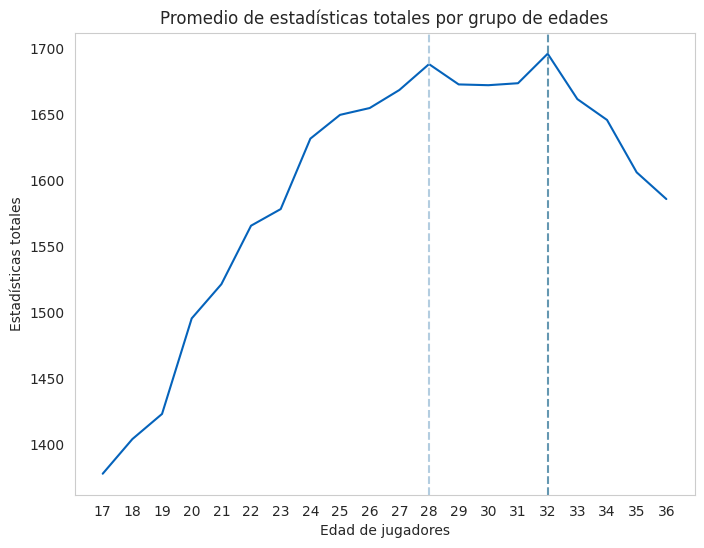

In [ ]:
x = data['age']
y = data['total_stats']

sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.despine(ax=None)

plt.figure(figsize=(8, 6))
plt.title("Promedio de estadísticas totales por grupo de edades")
plt.xlabel("Edad de jugadores")
plt.ylabel("Estadísticas totales")

plt.xticks(x)
sns.lineplot(x=x, y=y, color='#0563BB')
plt.grid(False)

plt.axvline(x=32, color='#6497b1', linestyle='--')
plt.axvline(x=28, color='#b3cde0', linestyle='--')

plt.show()

Parece que existen dos puntos de máximo rendimiento en todas las estadísticas, a los 28 años y a los 32 años. Sin embargo, no para todas las posiciones debe ser igual.

In [ ]:
df_1 =pd.merge(df_1, pdynamic, on='player_id')

Traduciremos las posiciones a portero, delantero, medio y defensa:

| Abreviatura | Nombre completo                        | Posición                             |
|-------------|---------------------------------------|--------------------------------------|
| RW          | Right Winger                          | Delantero                            |
| ST          | Striker                               | Delantero                            |
| GK          | Goalkeeper                            | Portero                              |
| CAM         | Central Attacking Midfielder          | Mediocampista Ofensivo Central       |
| LW          | Left Winger                           | Delantero                            |
| CB          | Centre-Back                           | Defensa                              |
| CDM         | Central Defensive Midfielder          | Mediocampista Defensivo Central      |
| CF          | Centre Forward                        | Delantero                            |
| CM          | Centre Midfielder                      | Mediocampista Central                |
| RB          | Right Back                            | Defensa                              |
| LB          | Left Back                             | Defensa                              |
| LM          | Left Midfielder                       | Mediocampista Izquierdo              |
| RM          | Right Midfielder                      | Mediocampista Derecho                |
| LWB         | Left Wing-Back                        | Defensa por la Banda Izquierda       |
| RWB         | Right Wing-Back                       | Defensa por la Banda Derecha         |


In [ ]:
posiciones = {
    'RW': 'Delantero',
    'ST': 'Delantero',
    'GK': 'Portero',
    'CAM': 'Mediocampista',
    'LW': 'Delantero',
    'CB': 'Defensa',
    'CDM': 'Mediocampista',
    'CF': 'Delantero',
    'CM': 'Mediocampista',
    'RB': 'Defensa',
    'LB': 'Defensa',
    'LM': 'Mediocampista',
    'RM': 'Mediocampista',
    'LWB': 'Defensa',
    'RWB': 'Defensa'
}


In [ ]:
df_1['posicion'] = df_1['best_position'].map(posiciones)

In [ ]:
# age_valid = list(df_1.groupby('age').filter(lambda x: len(x) >= 100)['age'].unique())

data_delantero = df_1.loc[(df_1['posicion'] == 'Delantero') & (df_1['age'].isin(age_valid))].groupby('age')['total_stats'].mean().reset_index()
data_medio = df_1.loc[(df_1['posicion'] == 'Mediocampista') & (df_1['age'].isin(age_valid))].groupby('age')['total_stats'].mean().reset_index()
data_defensa = df_1.loc[(df_1['posicion'] == 'Defensa') & (df_1['age'].isin(age_valid))].groupby('age')['total_stats'].mean().reset_index()
data_portero = df_1.loc[(df_1['posicion'] == 'Portero') & (df_1['age'].isin(age_valid))].groupby('age')['total_stats'].mean().reset_index()

<Figure size 640x480 with 0 Axes>

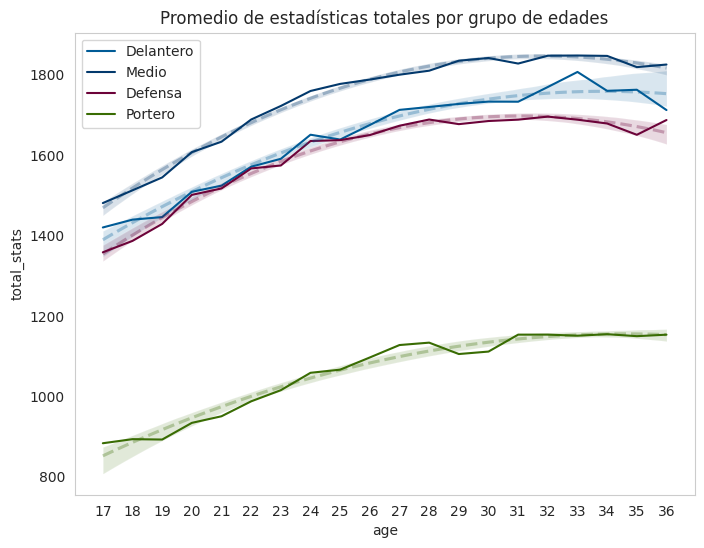

In [ ]:
x = data['age']
y_delantero = data_delantero['total_stats']
y_medio = data_medio['total_stats']
y_defensa = data_defensa['total_stats']
y_portero = data_portero['total_stats']

sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.despine(ax=None)

plt.figure(figsize=(8, 6))
plt.title("Promedio de estadísticas totales por grupo de edades")
plt.xlabel("Edad de jugadores")
plt.ylabel("Estadísticas totales")

plt.xticks(x)
sns.lineplot(x=x, y=y_delantero, color='#005b96', label='Delantero')
sns.lineplot(x=x, y=y_medio, color='#03396c', label='Medio')
sns.lineplot(x=x, y=y_defensa, color='#6c0339', label='Defensa')
sns.lineplot(x=x, y=y_portero, color='#396c03', label='Portero')

sns.regplot(x=x, y=y_delantero, color='#005b96', scatter=False, order=2,
            line_kws={'linestyle': '--', 'alpha': 0.3})
sns.regplot(x=x, y=y_medio, color='#03396c', scatter=False, order=2,
            line_kws={'linestyle': '--', 'alpha': 0.3})
sns.regplot(x=x, y=y_defensa, color='#6c0339', scatter=False, order=2,
            line_kws={'linestyle': '--', 'alpha': 0.3})
sns.regplot(x=x, y=y_portero, color='#396c03', scatter=False, order=2,
            line_kws={'linestyle': '--', 'alpha': 0.3})



plt.grid(False)

# plt.axvline(x=32, color='#6497b1', linestyle='--')
# plt.axvline(x=28, color='#b3cde0', linestyle='--')

plt.show()

### ¿Qué ocurre con todas las demás estadísticas?

In [ ]:
def plot_stat_age(df_1, s, ax):
    data_delantero = df_1.loc[(df_1['posicion'] == 'Delantero') & (df_1['age'].isin(age_valid))].groupby('age')[s].mean().reset_index()
    data_medio = df_1.loc[(df_1['posicion'] == 'Mediocampista') & (df_1['age'].isin(age_valid))].groupby('age')[s].mean().reset_index()
    data_defensa = df_1.loc[(df_1['posicion'] == 'Defensa') & (df_1['age'].isin(age_valid))].groupby('age')[s].mean().reset_index()
    data_portero = df_1.loc[(df_1['posicion'] == 'Portero') & (df_1['age'].isin(age_valid))].groupby('age')[s].mean().reset_index()

    x = data['age']
    y_delantero = data_delantero[s]
    y_medio = data_medio[s]
    y_defensa = data_defensa[s]
    y_portero = data_portero[s]

    sns.set_style("whitegrid")
    sns.set_palette("pastel")
    sns.despine(ax=ax)

    ax.set_title(s)
    ax.set_xlabel("Edad de jugadores")
    ax.set_ylabel(s)

    ax.set_xticks(x)

    sns.lineplot(x=x, y=y_delantero, color='#005b96', label='Delantero', ax=ax)
    sns.lineplot(x=x, y=y_medio, color='#03396c', label='Medio', ax=ax)
    sns.lineplot(x=x, y=y_defensa, color='#6c0339', label='Defensa', ax=ax)
    sns.lineplot(x=x, y=y_portero, color='#396c03', label='Portero', ax=ax)

    sns.regplot(x=x, y=y_delantero, color='#005b96', scatter=False, order=2,
                line_kws={'linestyle': '--', 'alpha': 0.3}, ax=ax)
    sns.regplot(x=x, y=y_medio, color='#03396c', scatter=False, order=2,
                line_kws={'linestyle': '--', 'alpha': 0.3}, ax=ax)
    sns.regplot(x=x, y=y_defensa, color='#6c0339', scatter=False, order=2,
                line_kws={'linestyle': '--', 'alpha': 0.3}, ax=ax)
    sns.regplot(x=x, y=y_portero, color='#396c03', scatter=False, order=2,
                line_kws={'linestyle': '--', 'alpha': 0.3}, ax=ax)

    ax.grid(False)


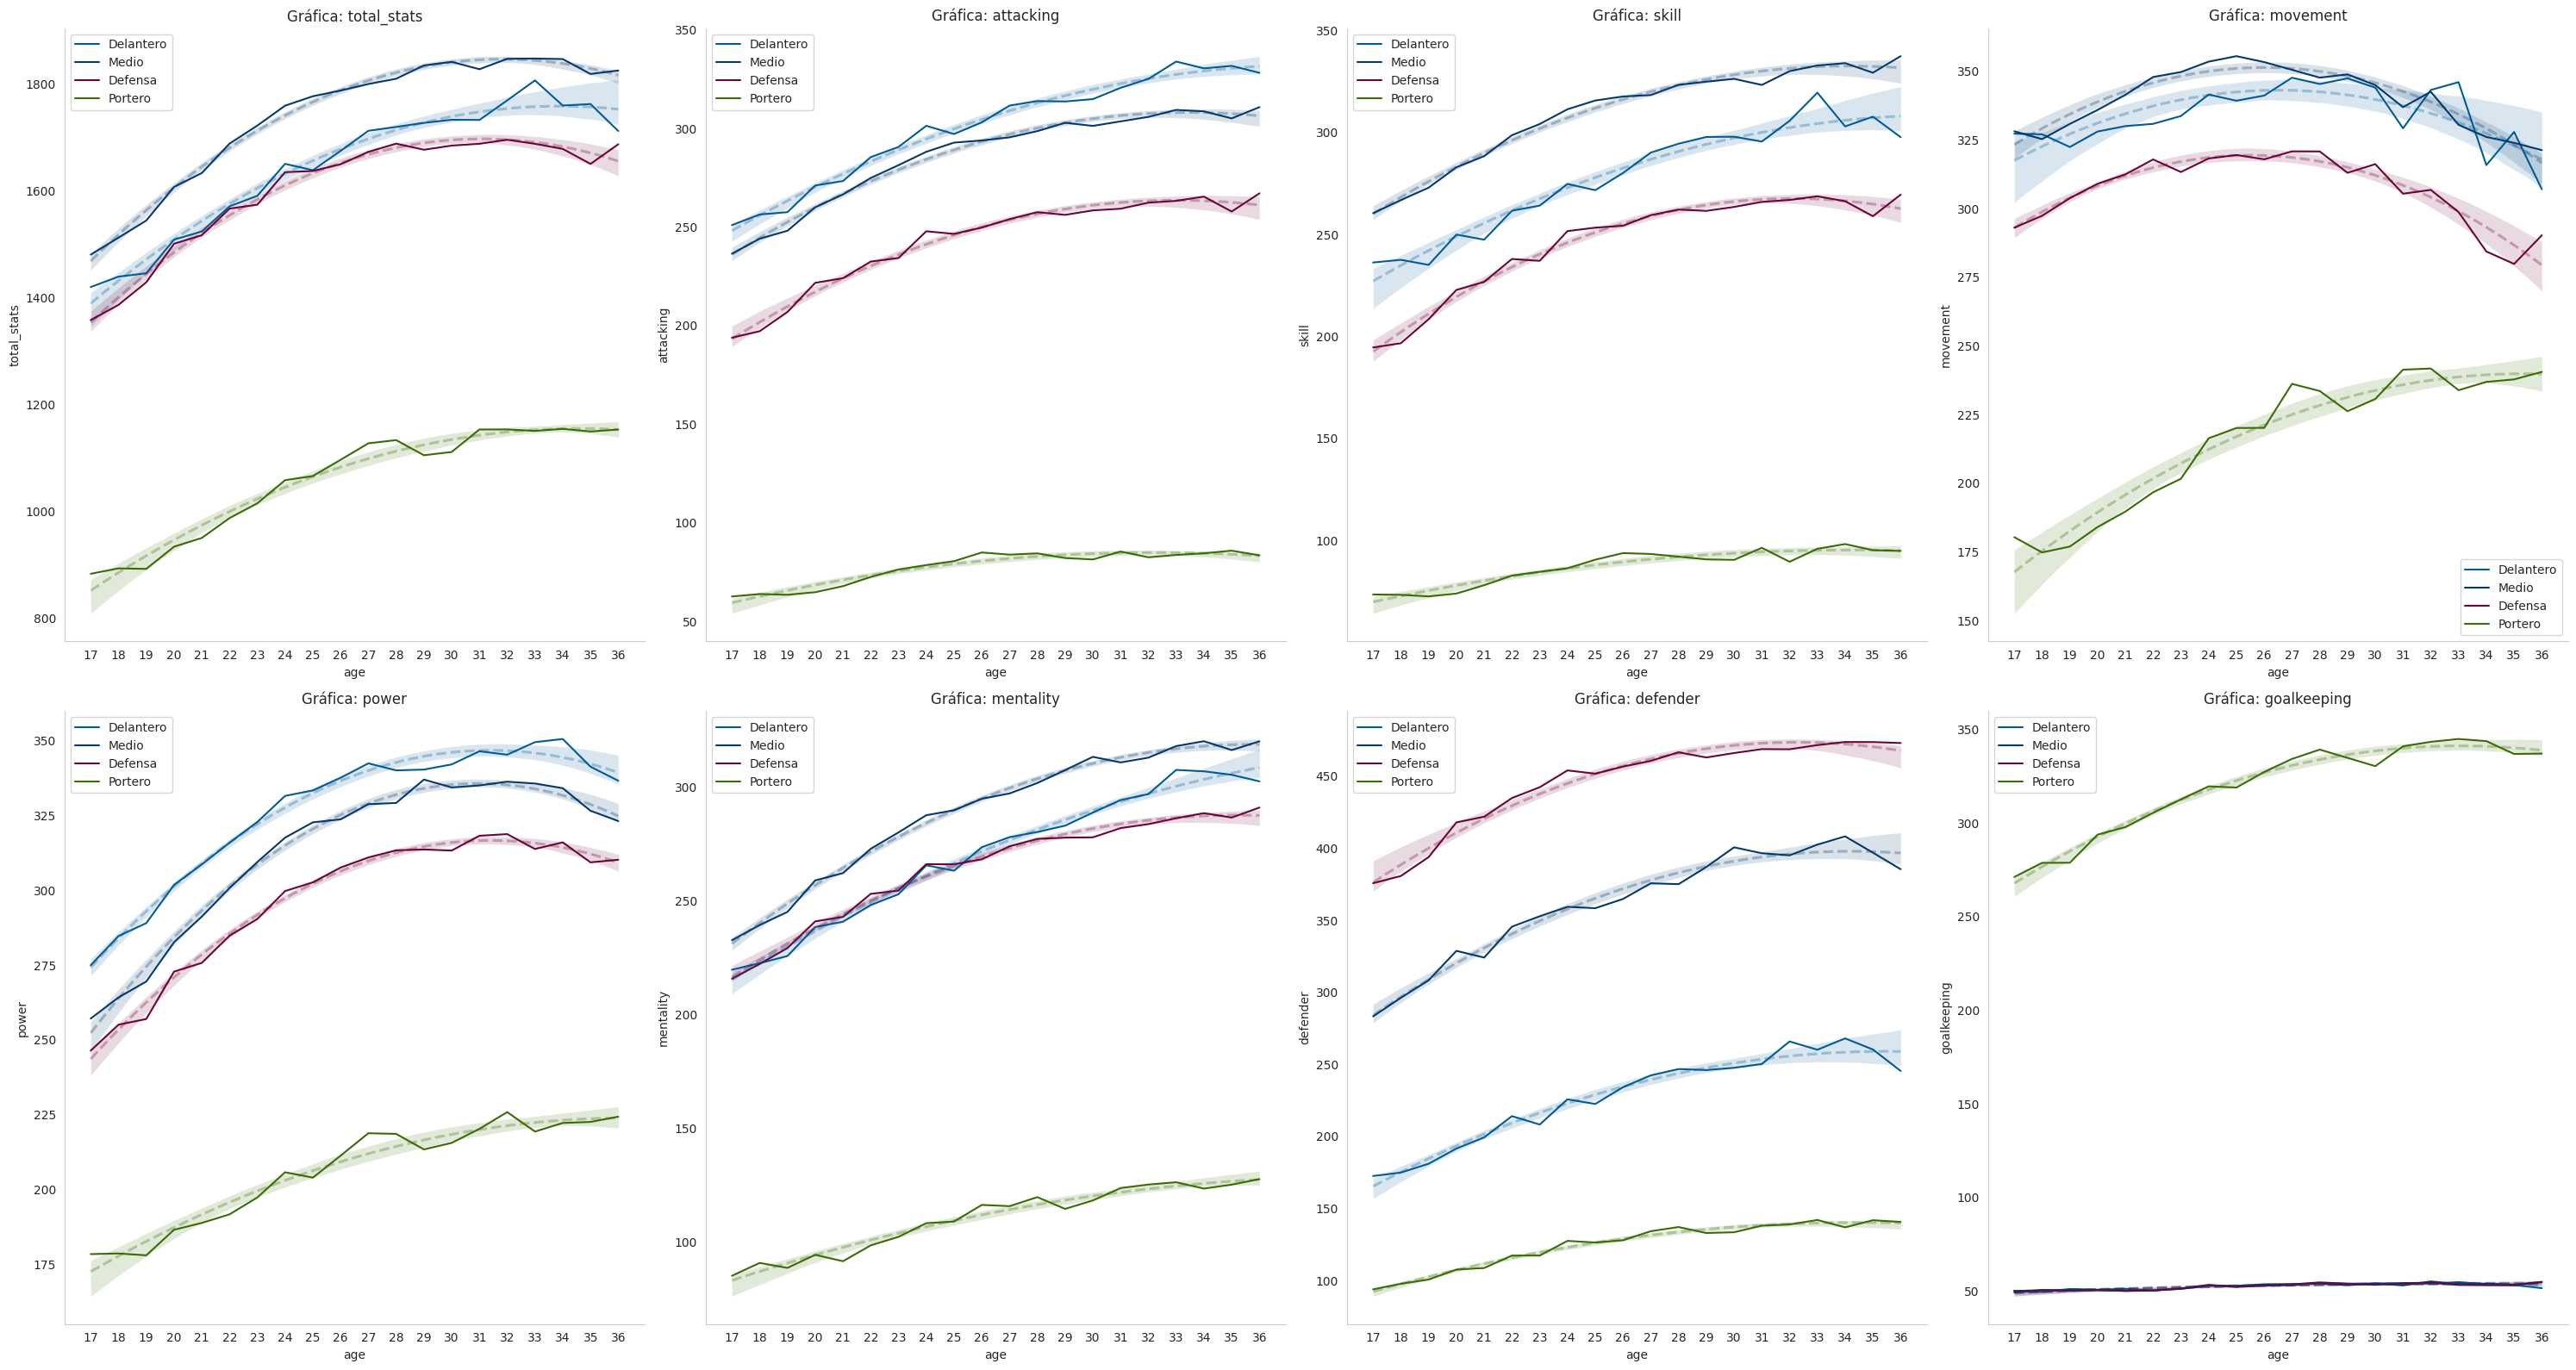

In [ ]:
# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 16))

# Lista de columnas para graficar
columns = pstats.columns[1:]

# Iterar sobre los subplots y las columnas
for ax, column in zip(axes.flatten(), columns):
    plot_stat_age(df_1, column, ax=ax)
    ax.set_title(f'Gráfica: {column}')
    #ax.axis('off')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## 2. ¿Cuáles posiciones juegan más los futbolistas zurdos?

In [ ]:
data_left = df_1.loc[(df_1['foot'] == 'Left')].groupby('best_position')['foot'].count().reset_index()
data_right = df_1.loc[(df_1['foot'] == 'Right')].groupby('best_position')['foot'].count().reset_index()
data_foot = pd.merge(data_left, data_right, on='best_position')

In [ ]:
data_foot['best_position'].unique()

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object)

Considerando la posición de juego se pueden clasificar del siguiente modo:

| Abreviación | Significado en inglés | Ubicación |
|-------------|----------------------|-----------|
| CAM         | Center Attacking Midfielder | Center |
| CB          | Center Back | Center |
| CDM         | Center Defensive Midfielder | Center |
| CF          | Center Forward | Center |
| CM          | Center Midfielder | Center |
| GK          | Goalkeeper | Center |
| LB          | Left Back | Left |
| LM          | Left Midfielder | Left |
| LW          | Left Winger | Left |
| LWB         | Left Wing Back | Left |
| RB          | Right Back | Right |
| RM          | Right Midfielder | Right |
| RW          | Right Winger | Right |
| RWB         | Right Wing Back | Right |
| ST          | Striker | Center |



In [ ]:
location = {
    'CAM': 'Center',
    'CB': 'Center',
    'CDM': 'Center',
    'CF': 'Center',
    'CM': 'Center',
    'GK': 'Center',
    'LB': 'Left',
    'LM': 'Left',
    'LW': 'Left',
    'LWB': 'Left',
    'RB': 'Right',
    'RM': 'Right',
    'RW': 'Right',
    'RWB': 'Right',
    'ST': 'Center'
}

In [ ]:
data_foot['location'] = data_foot['best_position'].map(location)

In [ ]:
data_foot = data_foot.rename(columns={'foot_x':'left_foot', 'foot_y':'right_foot'})

In [ ]:
data_foot.head()

,best_position,left_foot,right_foot,location
0,CAM,621,1678,Center
1,CB,832,2853,Center
2,CDM,182,1263,Center
3,CF,12,66,Center
4,CM,214,833,Center


In [ ]:
data_feet1 = data_foot.groupby('location')[['left_foot', 'right_foot']].sum().reset_index()
# data_right = data_foot.groupby('location')['right_foot'].sum()

total_left = data_feet1['left_foot'].sum()
total_right = data_feet1['right_foot'].sum()
total = total_left + total_right
total_left /= total/100
total_right /= total/100

data_feet1['p_left'] = data_feet1['left_foot'].div(total)*100
data_feet1['p_right'] = data_feet1['right_foot'].div(total)*100

In [ ]:
total_left

23.890820950574348

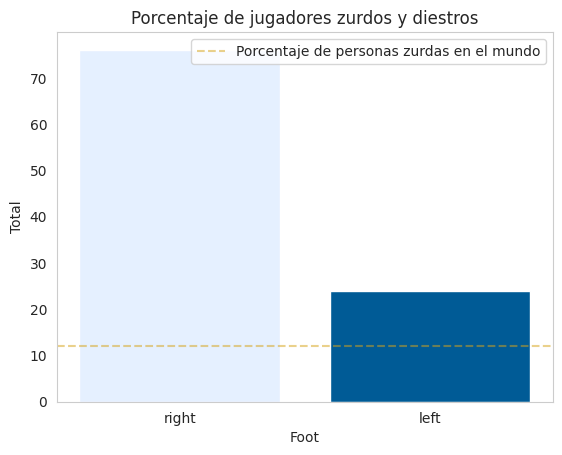

In [ ]:
foot = ['right', 'left']
y = [total_right, total_left]

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear las barras
colors = ['#e5f0ff','#005b96']

ax.bar(foot, y, color=colors)

# Personalizar la gráfica
ax.set_xlabel('Foot')
ax.set_ylabel('Total')
ax.set_title('Porcentaje de jugadores zurdos y diestros')

plt.axhline(12, color='#d6a419', linestyle='--', alpha=0.5, label='Porcentaje de personas zurdas en el mundo')
ax.legend()
ax.grid(False)
# Mostrar la gráfica
plt.show()

In [ ]:
data_feet1

,location,left_foot,right_foot,p_left,p_right
0,Center,2487,10822,13.104647,57.023922
1,Left,1890,514,9.958900,2.708399
2,Right,157,3108,0.827274,16.376857


Text(0, 0.5, '% de jugadores')

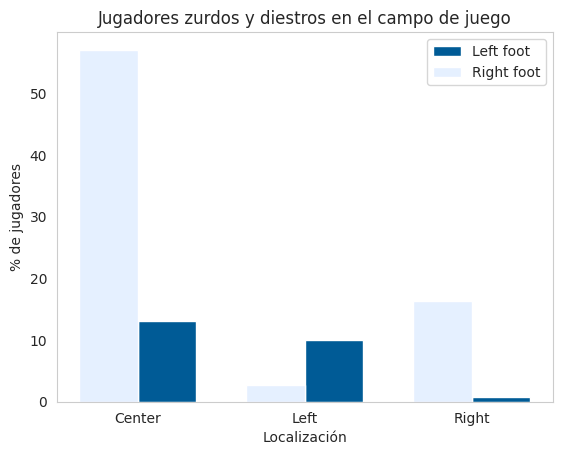

In [ ]:
data_feet1 = data_feet1.sort_values('p_left', ascending=False)
locations = data_feet1['location']
x = np.arange(len(locations))

width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x + width/2, data_feet1['p_left'], 
                width, label='Left foot', color='#005b96')
rects2 = ax.bar(x - width/2, data_feet1['p_right'], 
                width, label='Right foot', color='#e5f0ff')

ax.set_xticks(x)
ax.set_xticklabels(locations)

ax.legend()
ax.grid(False)
ax.set_title('Jugadores zurdos y diestros en el campo de juego')
ax.set_xlabel('Localización')
ax.set_ylabel('% de jugadores')


Parece contraintuitivo, pero la mayoría de los jugadores zurdos juegan en medio en lugar de la parte izquierda del campo.

In [ ]:
data_feet2 = data_foot.groupby('best_position')[['left_foot', 'right_foot']].sum().reset_index()
# data_right = data_foot.groupby('location')['right_foot'].sum()

total_left = data_feet2['left_foot'].sum()
total_right = data_feet2['right_foot'].sum()
total = total_left + total_right
total_left /= total/100
total_right /= total/100

data_feet2['p_left'] = data_feet2['left_foot'].div(total)*100
data_feet2['p_right'] = data_feet2['right_foot'].div(total)*100

In [ ]:
data_feet2 = data_feet2.sort_values(by='p_left', ascending=False)

Text(0, 0.5, '% de jugadores')

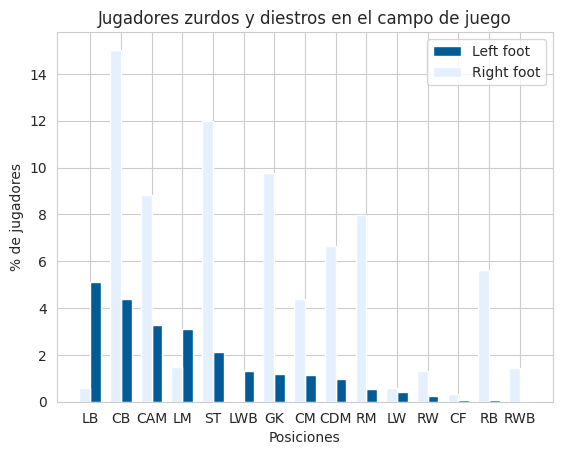

In [ ]:
positions = data_feet2['best_position']
x = np.arange(len(positions))

width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x + width/2, data_feet2['p_left'], 
                width, label='Left foot', color='#005b96')
rects2 = ax.bar(x - width/2, data_feet2['p_right'], 
                width, label='Right foot', color='#e5f0ff')

ax.set_xticks(x)
ax.set_xticklabels(positions)

ax.legend()

ax.set_title('Jugadores zurdos y diestros en el campo de juego')
ax.set_xlabel('Posiciones')
ax.set_ylabel('% de jugadores')


Pero es un hecho que la posición con mayor cantidad de jugadores zurdos es LB, el lateral izquierdo, donde su responsabilidad es defender su zona y marcar a los delanteros contrarios, que en la mayoría serán delanteros derechos. Algo similar ocurre con el defensa central. Además, se puede observar que la mayoría de los jugadores diestros son Strikers o defensas centrales.


## 3. ¿Cuales estádisticas importan más según cada posición?

Para darnos una idea buscaremos en el decil con mayores ingresos por posición y ordenaremos las medias de sus estadísticas.

In [ ]:
df_3 = pd.merge(pd.merge(pstats, pvalue, on='player_id'), pdynamic, on='player_id')

In [ ]:
ninth = df_3['value'].quantile(0.9)
mvps = df_3.loc[df_3['value']>=ninth]


In [ ]:
stats = list(pstats.columns)
stats.remove('player_id')
stats.append('value')
mvps_stats = mvps.groupby('best_position')[stats].mean().reset_index()
# mvps_stats = mvps_stats.drop('player_id', axis=1)
all_stats = df_3.groupby('best_position')[stats].mean().reset_index()
# all_stats = all_stats.drop('player_id', axis=1)

In [ ]:

for stat in stats:
  temp = mvps_stats.sort_values(by=stat, ascending=False)[['best_position', stat]].iloc[0]
  print(temp)

best_position             CM
total_stats      2056.769231
Name: 4, dtype: object
best_position            CF
attacking        369.173913
Name: 3, dtype: object
best_position           CAM
skill            376.280757
Name: 0, dtype: object
best_position            RW
movement         411.848485
Name: 12, dtype: object
best_position            ST
power            377.042308
Name: 14, dtype: object
best_position            CM
mentality        360.455621
Name: 4, dtype: object
best_position            CB
defender         542.957792
Name: 1, dtype: object
best_position           GK
goalkeeping      391.20979
Name: 5, dtype: object
best_position                 LW
value            20814814.814815
Name: 8, dtype: object


In [ ]:
result = (mvps_stats[stats] / all_stats[stats] - 1) * 100

In [ ]:
result['position'] = mvps_stats['best_position']

In [ ]:
result

,total_stats,attacking,skill,movement,power,mentality,defender,goalkeeping,value,position
0,15.131886,19.874916,19.636426,11.073710,13.922904,17.147436,10.919578,1.980459,391.392888,CAM
1,16.701012,20.654001,23.550952,10.805583,12.641037,19.482327,20.333712,0.338179,543.562261,CB
2,13.602075,17.157788,16.748089,6.015832,12.912595,16.434684,17.609717,-1.307614,395.458597,CDM
3,8.882221,12.733685,11.589669,4.638979,7.879780,10.775258,9.470057,-6.057823,165.440185,CF
4,13.726197,17.225704,17.601654,7.896596,11.374048,16.018997,16.733555,-0.089433,325.382017,CM
5,20.113928,17.147338,17.567973,23.341470,16.770163,20.036087,19.906357,22.465160,746.634230,GK
6,18.130134,24.762256,23.699382,10.636366,16.629800,20.597663,18.977158,0.968083,513.424806,LB
7,13.603914,16.298352,17.806318,10.477650,12.391560,15.662787,11.843931,0.670365,391.272969,LM
8,14.213099,17.957219,19.495932,9.460245,12.556130,17.736375,12.511939,-4.917884,399.434611,LW
9,14.978939,18.466044,21.232272,8.006197,14.799718,16.336862,17.170333,-2.219380,389.242634,LWB


Resulta que para ser uno de los mejor pagado en algunas posiciones, debes ser peor portero que otros. Hablando en serio, donde está la diferencia más marcada es en el valor de los mejores porteros

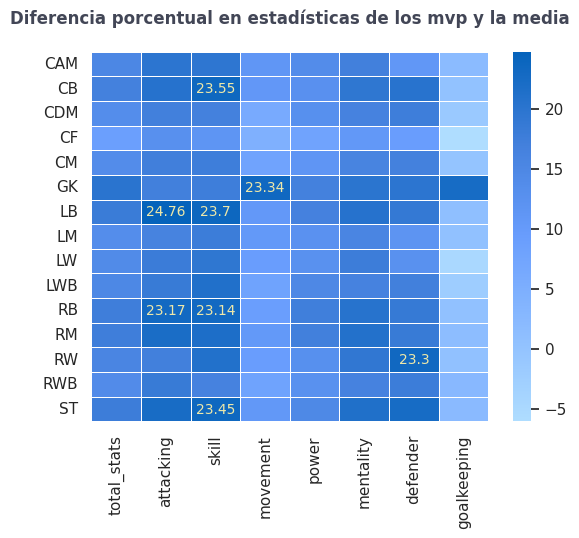

In [ ]:
import matplotlib.colors as mcolors

# Elimina la columna de dimensiones del DataFrame si así lo deseas
df_medidas = result.drop('position', axis=1)
df_medidas = df_medidas.drop('value', axis=1)


sns.set(style="white")  # Establecer el estilo del mapa de calor
degradado= ['#AFDDFF', '#8CBCFF', '#699DFD','#4380DC', '#0563BB']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom", degradado)

# Define los nombres de las columnas para el eje x
nombres_columnas = df_medidas.columns

# Define los valores de la columna de dimensiones para el eje y
valores_dimensiones = result['position']

# Genera el mapa de calor utilizando el DataFrame sin la columna de dimensiones
ax = sns.heatmap(df_medidas, cmap=custom_cmap, annot=False, fmt=".2f", linewidths=0.5)

# Personaliza las etiquetas de los ejes x e y
# plt.xticks(range(len(nombres_columnas)), nombres_columnas)
# plt.yticks(range(len(valores_dimensiones)), valores_dimensiones, rotation=0)

ax.set_xticklabels(nombres_columnas, ha='center')
ax.set_yticklabels(valores_dimensiones, rotation=0, va='center')

# Ajusta el título según sea necesario
plt.title('Diferencia porcentual en estadísticas de los mvp y la media', 
          pad=20, fontweight='bold', color='#424656')


mask = df_medidas > 23
annot_values = df_medidas.mask(~mask, "")

for i in range(df_medidas.shape[0]):
    for j in range(df_medidas.shape[1]):
        v = annot_values.iloc[i, j]
        try:
          v = round(float(v), 2)
        except:
          None
        ax.text(j + 0.5, i + 0.5, v, ha='center', va='center', 
                fontsize=10, color='#EEE8A9')



# Muestra el mapa de calor
plt.show()

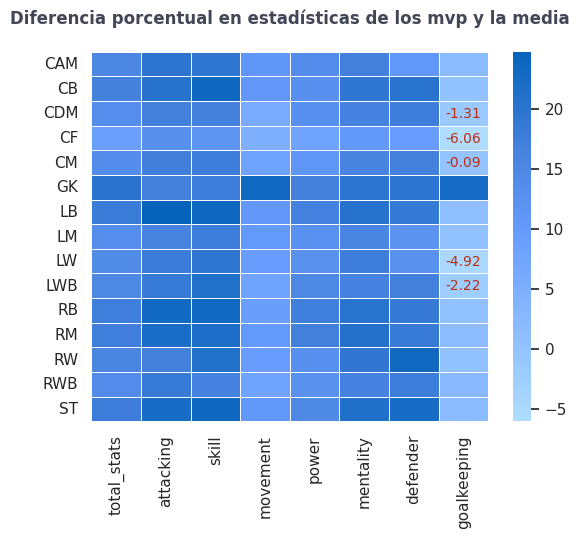

In [ ]:
import matplotlib.colors as mcolors

# Elimina la columna de dimensiones del DataFrame si así lo deseas
df_medidas = result.drop('position', axis=1)
df_medidas = df_medidas.drop('value', axis=1)


sns.set(style="white")  # Establecer el estilo del mapa de calor
degradado= ['#AFDDFF', '#8CBCFF', '#699DFD','#4380DC', '#0563BB']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom", degradado)

# Define los nombres de las columnas para el eje x
nombres_columnas = df_medidas.columns

# Define los valores de la columna de dimensiones para el eje y
valores_dimensiones = result['position']

# Genera el mapa de calor utilizando el DataFrame sin la columna de dimensiones
ax = sns.heatmap(df_medidas, cmap=custom_cmap, annot=False, fmt=".2f", linewidths=0.5)

# Personaliza las etiquetas de los ejes x e y
# plt.xticks(range(len(nombres_columnas)), nombres_columnas)
# plt.yticks(range(len(valores_dimensiones)), valores_dimensiones, rotation=0)

ax.set_xticklabels(nombres_columnas, ha='center')
ax.set_yticklabels(valores_dimensiones, rotation=0, va='center')

# Ajusta el título según sea necesario
plt.title('Diferencia porcentual en estadísticas de los mvp y la media', 
          pad=20, fontweight='bold', color='#424656')


mask = df_medidas <0
annot_values = df_medidas.mask(~mask, "")

for i in range(df_medidas.shape[0]):
    for j in range(df_medidas.shape[1]):
        v = annot_values.iloc[i, j]
        try:
          v = round(float(v), 2)
        except:
          None
        ax.text(j + 0.5, i + 0.5, v, ha='center', va='center', 
                fontsize=10, color='#BC2C12')



# Muestra el mapa de calor
plt.show()